In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Objective
 We just want to see what we have. 
 Then we analyze yield, area harvested and production each country.
 We end seeing things related to the yield and production like what factors affect them

In [2]:
df = pd.read_csv('./Total/total.csv')

In [23]:
#print(df.head())
print(df.shape)

(98, 20)


In [3]:
#Nulls
nulos_por_columna = df.isnull().sum()
porcentaje_nulos_por_columna = (df.isnull().sum() / len(df)) * 100
print(f""" lista de nulos por columna: 
{nulos_por_columna}

lista del porcentaje de de nulos por columna: 
{porcentaje_nulos_por_columna} """)

 lista de nulos por columna: 
Area                                                           0
Area Code (M49)                                                0
Area harvested (ha)                                            0
Production (tonnes)                                            0
Yield (hg/ha)                                                  4
Producer Price Index (2014-2016 = 100)                        24
Gross Production Index Number (2014-2016 = 100)                4
Gross per capita Production Index Number (2014-2016 = 100)     4
Export Quantity                                               94
Export Value                                                  94
Gross Production Value (constant 2014-2016 thousand US$)      30
Gross Production Value (current thousand US$)                 59
Rural population                                               0
Total Population - Both sexes                                  0
Total Population - Female                                   

<AxesSubplot: >

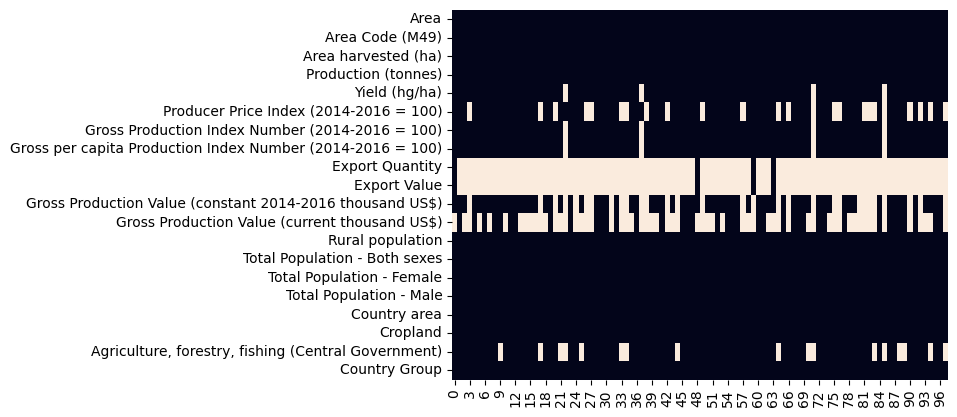

In [4]:
#Visualization nulls
# Here we have each row (a country) and, in white, the missing values.
(
    df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data=df,
                cbar=False
            )
        )
    )
)

In [29]:
print(df.dtypes)

Area                                                           object
Area Code (M49)                                                 int64
Area harvested (ha)                                           float64
Production (tonnes)                                           float64
Yield (hg/ha)                                                 float64
Producer Price Index (2014-2016 = 100)                        float64
Gross Production Index Number (2014-2016 = 100)               float64
Gross per capita Production Index Number (2014-2016 = 100)    float64
Export Quantity                                               float64
Export Value                                                  float64
Gross Production Value (constant 2014-2016 thousand US$)      float64
Gross Production Value (current thousand US$)                 float64
Rural population                                              float64
Total Population - Both sexes                                 float64
Total Population - F

In [5]:
df.describe()

Area Code (M49)  Area harvested (ha)  Production (tonnes)  \
count        98.000000         9.800000e+01         9.800000e+01   
mean        419.581633         3.008929e+05         3.023679e+06   
std         252.201561         1.118783e+06         8.239407e+06   
min          24.000000         0.000000e+00         0.000000e+00   
25%         185.000000         3.665000e+02         3.322467e+03   
50%         411.000000         1.886450e+04         1.649035e+05   
75%         633.000000         1.817500e+05         2.019734e+06   
max         894.000000         9.776650e+06         5.696916e+07   

       Yield (hg/ha)  Producer Price Index (2014-2016 = 100)  \
count      94.000000                               74.000000   
mean   126304.574468                              117.772297   
std     82344.683269                               50.860085   
min     10246.000000                               20.980000   
25%     64081.750000                               93.935000   
50%    111755.000000                              109.455000   
75%    161699.750000                              124.620000   
max    451011.000000                              388.360000   

       Gross Production Index Number (2014-2016 = 100)  \
count                                        94.000000   
mean                                        105.518830   
std                                          40.445662   
min                                          26.820000   
25%                                          96.132500   
50%                                         102.360000   
75%                                         110.037500   
max                                         331.920000   

       Gross per capita Production Index Number (2014-2016 = 100)  \
count                                          94.000000            
mean                                           98.784362            
std                                            35.652516            
min                                            24.330000            
25%                                            87.585000            
50%                                            96.190000            
75%                                           102.525000            
max                                           285.200000            

       Export Quantity  Export Value  \
count         4.000000      4.000000   
mean      91130.730000   4419.500000   
std      178542.149904   7888.708238   
min           0.120000      0.000000   
25%         321.502500    300.000000   
50%        2800.965000    721.500000   
75%       93610.192500   4841.000000   
max      358920.870000  16235.000000   

       Gross Production Value (constant 2014-2016 thousand US$)  \
count                                       6.800000e+01          
mean                                        6.608845e+05          
std                                         1.303349e+06          
min                                         8.000000e+00          
25%                                         7.206500e+03          
50%                                         1.061185e+05          
75%                                         5.484885e+05          
max                                         8.248366e+06          

       Gross Production Value (current thousand US$)  Rural population  \
count                                   3.900000e+01         98.000000   
mean                                    4.521039e+05      25491.081439   
std                                     8.072766e+05     106720.761179   
min                                     1.050000e+02          0.000000   
25%                                     6.484000e+03        295.550750   
50%                                     3.749800e+04       3949.847500   
75%                                     4.244250e+05      12031.135250   
max                                     3.181458e+06     896909.218000   

       Total Population - Both sexes  To

/tmp/ipykernel_82/4072613081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country Group', palette='Set2')


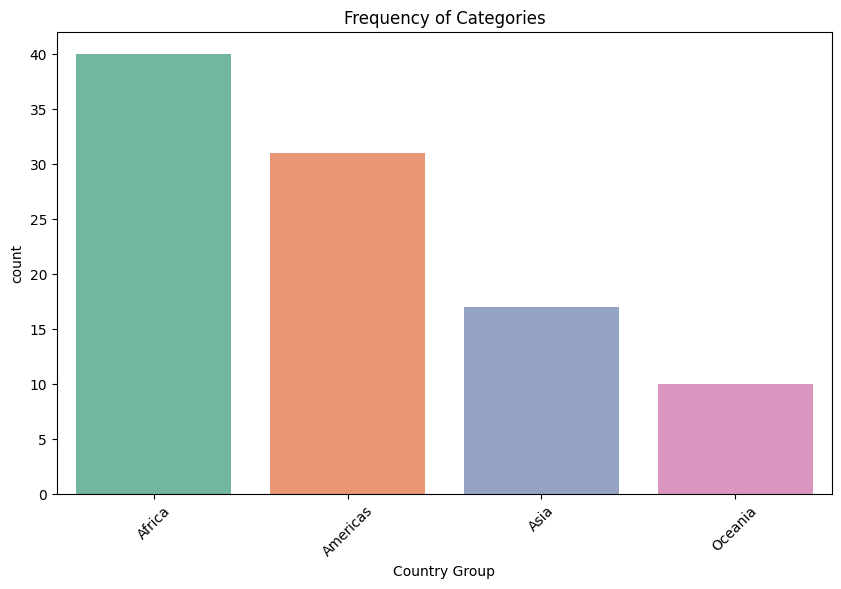

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country Group', palette='Set2')
plt.title('Frequency of Categories')
plt.xticks(rotation=45)
plt.show()

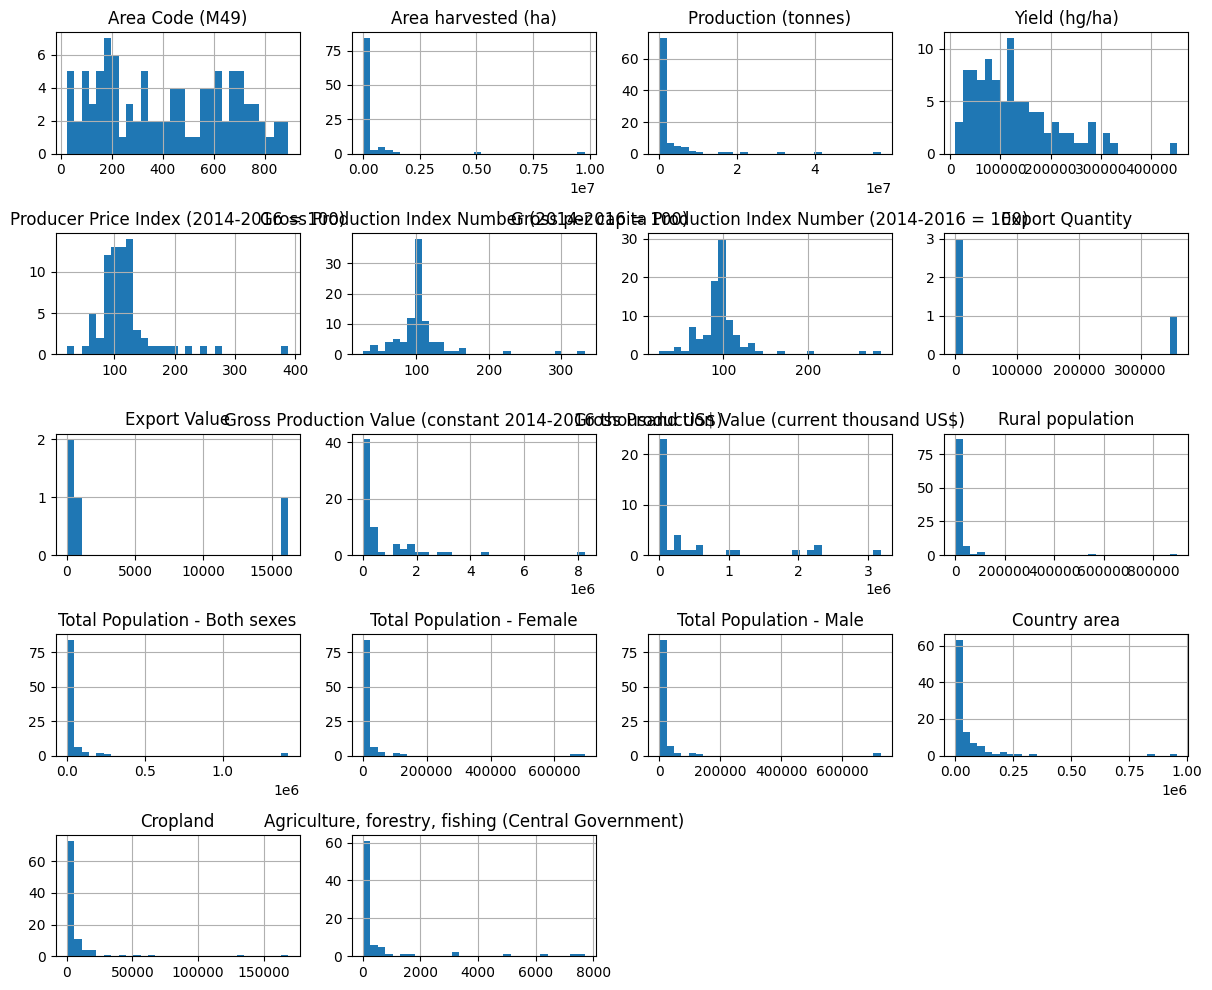

In [26]:
# For all numerical columns (subplots)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns # All numeric
df[numerical_cols].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

Untill now we can say that:

- We have a lot of nulls. This forces us to consider some cleaning steps. We see that there is no data about export and import. Gross production data is scarce also. We can say that FAO's datasets are not easily integrated.

- We must ignore  Area Code (M49) as it is categorical data. Area has the names of the countries and country group works better to agrupate them.

- The distribution of the numerical values is not normal... we may normalize it or remove outliers. Nonetheles, outliers may have a big impact on the results.

- Africa is the continent that has more countries in our dataset

However, we can deepen here.

Lets see some information about the top 10 producers. Lets see Area hervested, production, yield, country area, and their investment in agriculture, forestry and so on

In [56]:
columns = [
    'Area harvested (ha)', 
    'Production (tonnes)', 
    'Yield (hg/ha)', 
    'Country area', 
    'Gross Production Value (constant 2014-2016 thousand US$)',
    'Agriculture, forestry, fishing (Central Government)']

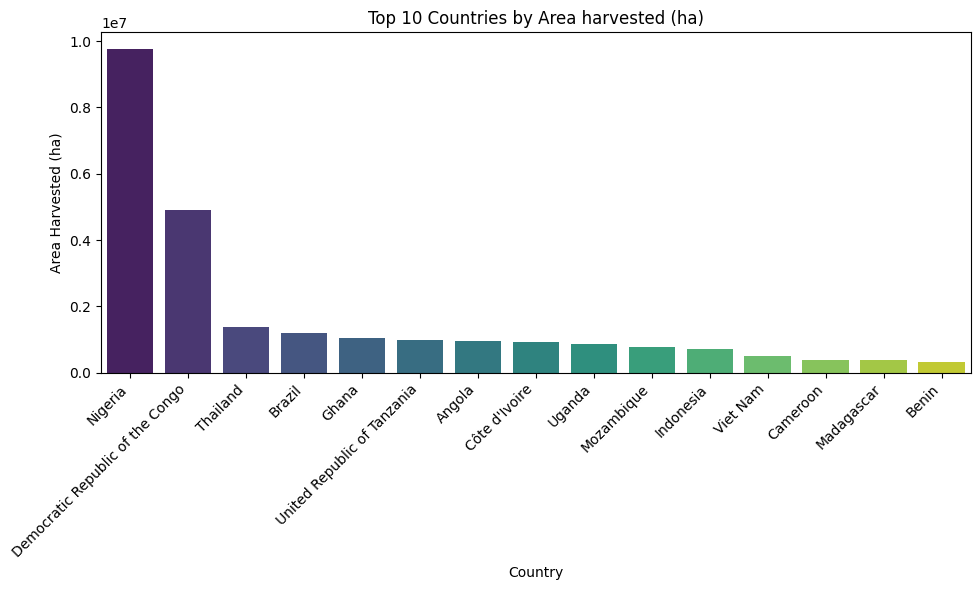

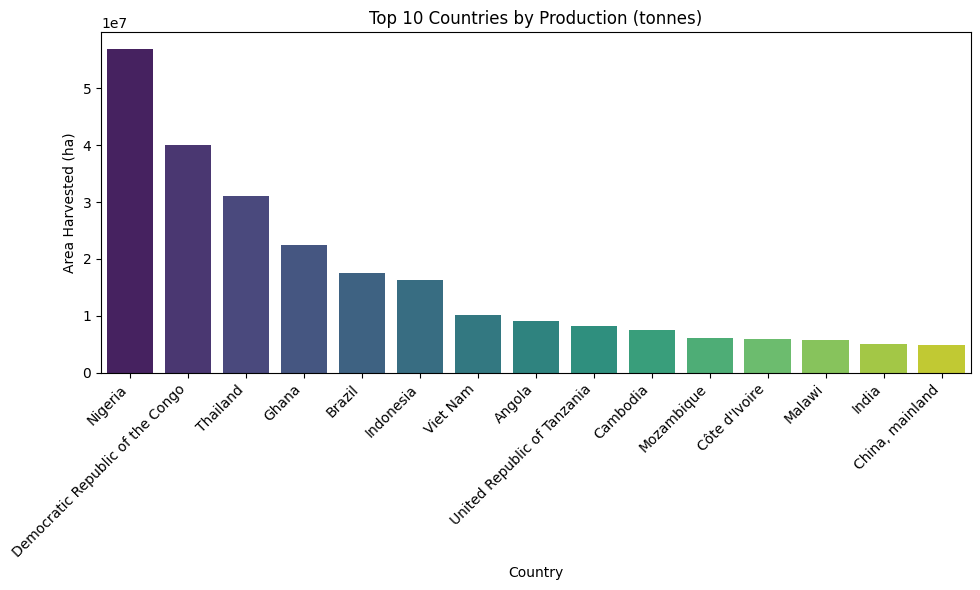

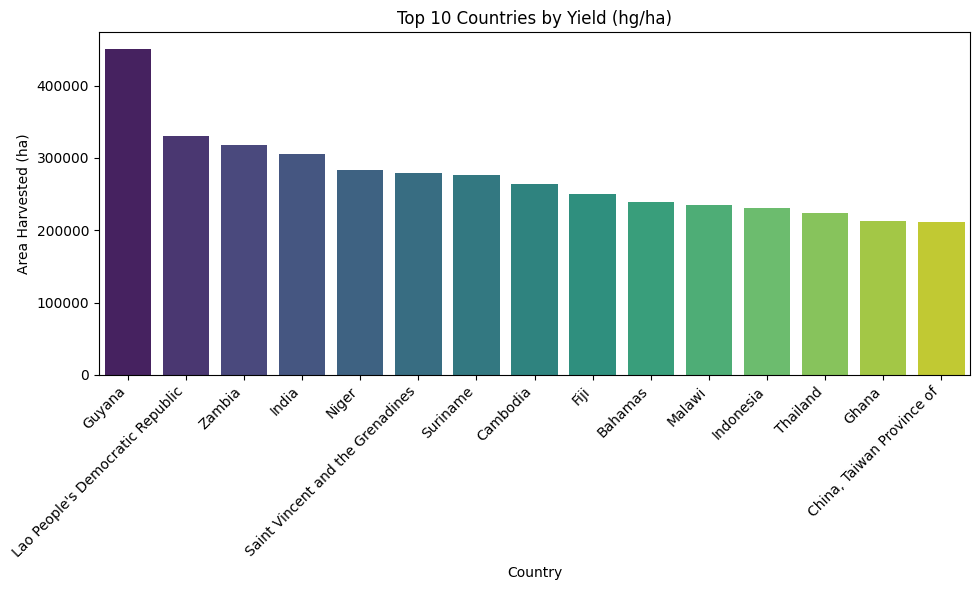

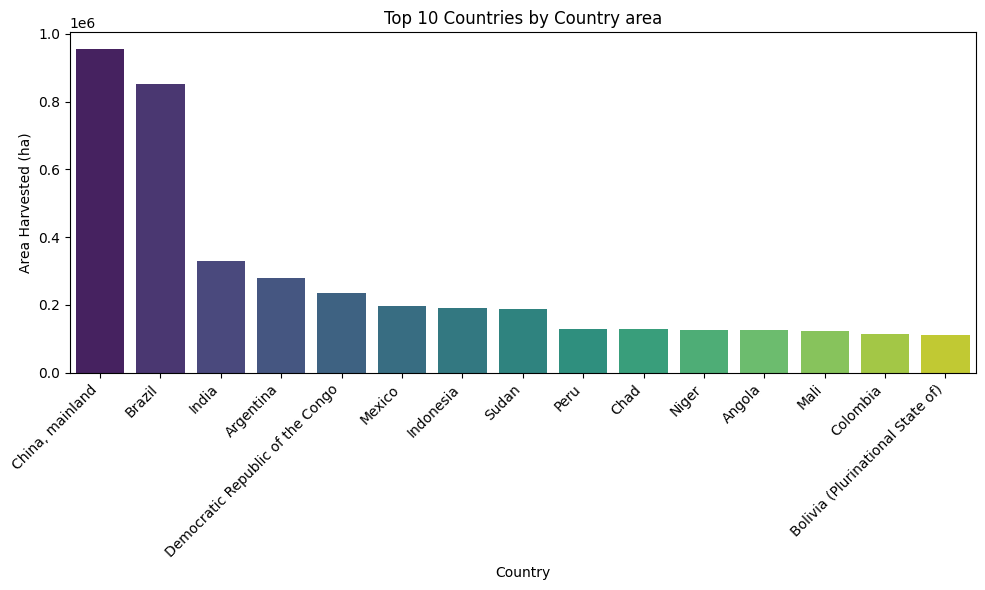

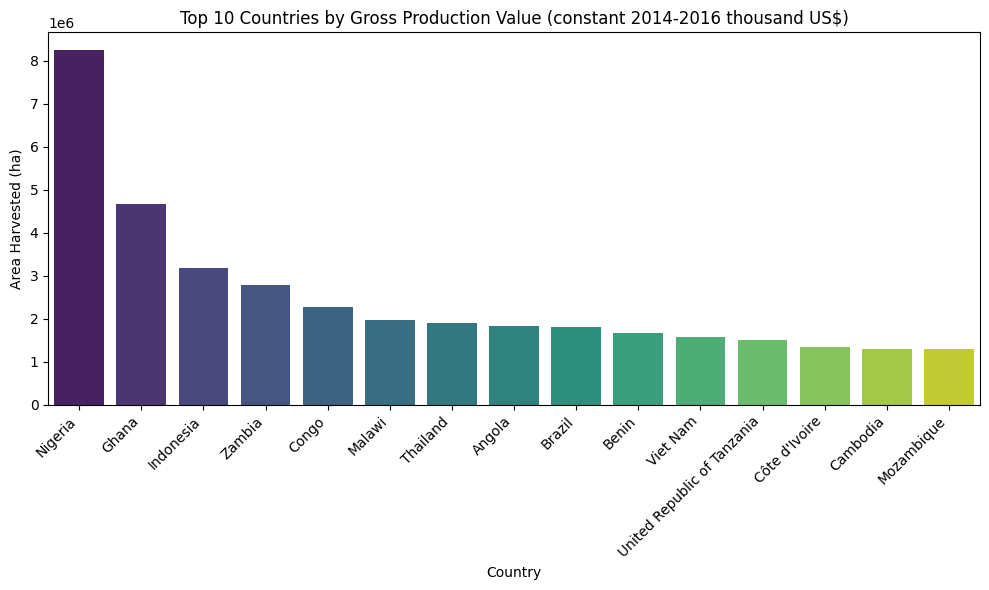

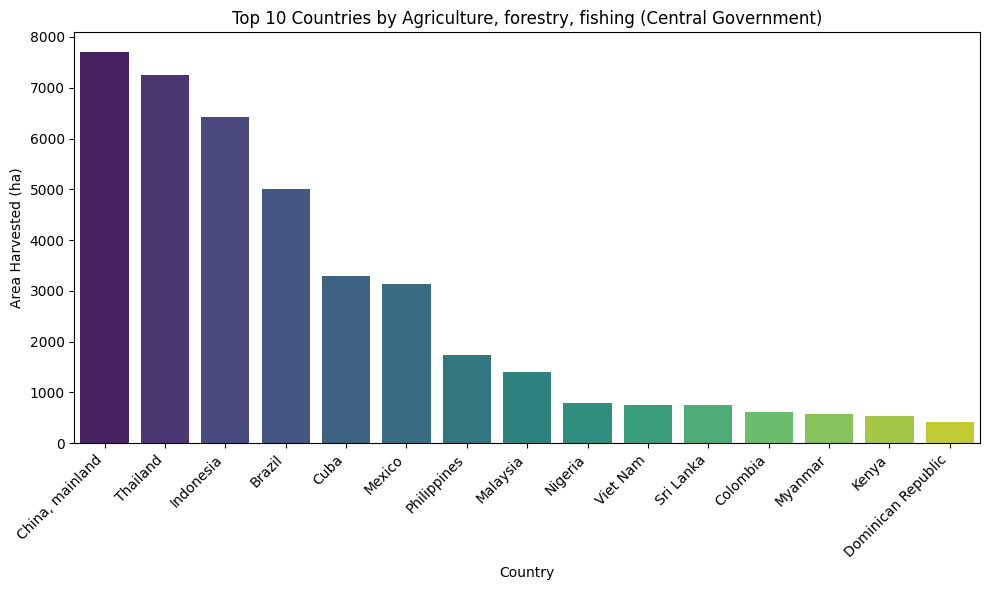

In [58]:
for column in columns:
    top = df.nlargest(15, column).sort_values(column, ascending=False)
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=top,
        x='Area',                # Countries on x-axis
        y=column, # Values on y-axis
        hue='Area',              
        palette='viridis',       
        dodge=False,             
        legend=False             
    )
    plt.title(f'Top 10 Countries by {column}')
    plt.xlabel('Country')
    plt.ylabel('Area Harvested (ha)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Lets hangle the nulls to make some final relations.

We lost a lot of data!

In [62]:
#Delete categories withouth relevant information 
df.drop(['Area Code (M49)'], axis=1, inplace=True)
df.drop(['Total Population - Male', 
'Total Population - Female'], axis=1, inplace=True)
# delte categories with 58 a 90 % of nulls
df.drop(['Export Quantity',
       'Export Value', 'Gross Production Value (current thousand US$)'],
        axis=1, inplace=True)
#Delete categories with more than 31% nulls
df.drop('Gross Production Value (constant 2014-2016 thousand US$)', axis=1, inplace=True)
#No prices
df.drop(['Producer Price Index (2014-2016 = 100)'], axis=1, inplace=True)
#Just remove nulls, not columns
df = df.dropna(subset=['Agriculture, forestry, fishing (Central Government)'])
#Nulls in gross index
df = df.dropna(subset=['Gross Production Index Number (2014-2016 = 100)'])

In [64]:
df

Area  Area harvested (ha)  Production (tonnes)  \
0                        Angola             945328.0           9000432.00   
1           Antigua and Barbuda                 13.0                68.03   
2                     Argentina              19608.0            196336.41   
3                       Bahamas                 35.0               840.22   
4                      Barbados                 25.0               485.50   
..                          ...                  ...                  ...   
91          Trinidad and Tobago                329.0              1285.00   
92                       Uganda             871908.0           2660000.00   
93  United Republic of Tanzania             990835.0           8184093.00   
95                     Viet Nam             517775.0          10174858.09   
96                       Zambia             126869.0           4036584.00   

    Yield (hg/ha)  Gross Production Index Number (2014-2016 = 100)  \
0         95210.0                                           115.95   
1         51095.0                                            53.11   
2        100131.0                                           103.64   
3        238443.0                                            99.67   
4        197687.0                                           102.38   
..            ...                                              ...   
91        39058.0                                            47.01   
92        30508.0                                            96.50   
93        82598.0                                           152.68   
95       196511.0                                            95.81   
96       318169.0                                           295.71   

    Gross per capita Production Index Number (2014-2016 = 100)  \
0                                              100.79            
1                                               51.83            
2                                              100.18            
3                                               96.70            
4                                              101.60            
..                                                ...            
91                                              45.13            
92                                              84.22            
93                                             134.06            
95                                              92.23            
96                                             263.92            

    Rural population  Total Population - Both sexes  Country area    Cropland  \
0          10751.626                      32353.588      124670.0   5215.0000   
1             78.577                         92.117          44.0      5.0000   
2           3612.215                      44745.520      278040.0  33700.7597   
3             67.996                        404.557        1388.0     12.0000   
4            197.584                        280.180          43.0      8.0000   
..               ...                            ...           ...         ...   
91           643.884                       1519.955         513.0     47.0000   
92         34576.219                      42949.080       24155.0   9100.0000   
93         39898.166                      59872.579       94730.0  15309.7000   
95         61742.331                      95776.716       33131.0  11746.0000   
96         10143.883                      18380.477       75261.0   3836.0000   

    Agriculture, forestry, fishing (Central Government) Country Group  
0                                              256.88          Africa  
1                                                4.20        Americas  
2                                              277.37        Americas  
3                                               30.43        Americas  
4                                               30.05        Americas  
..                                                ...          

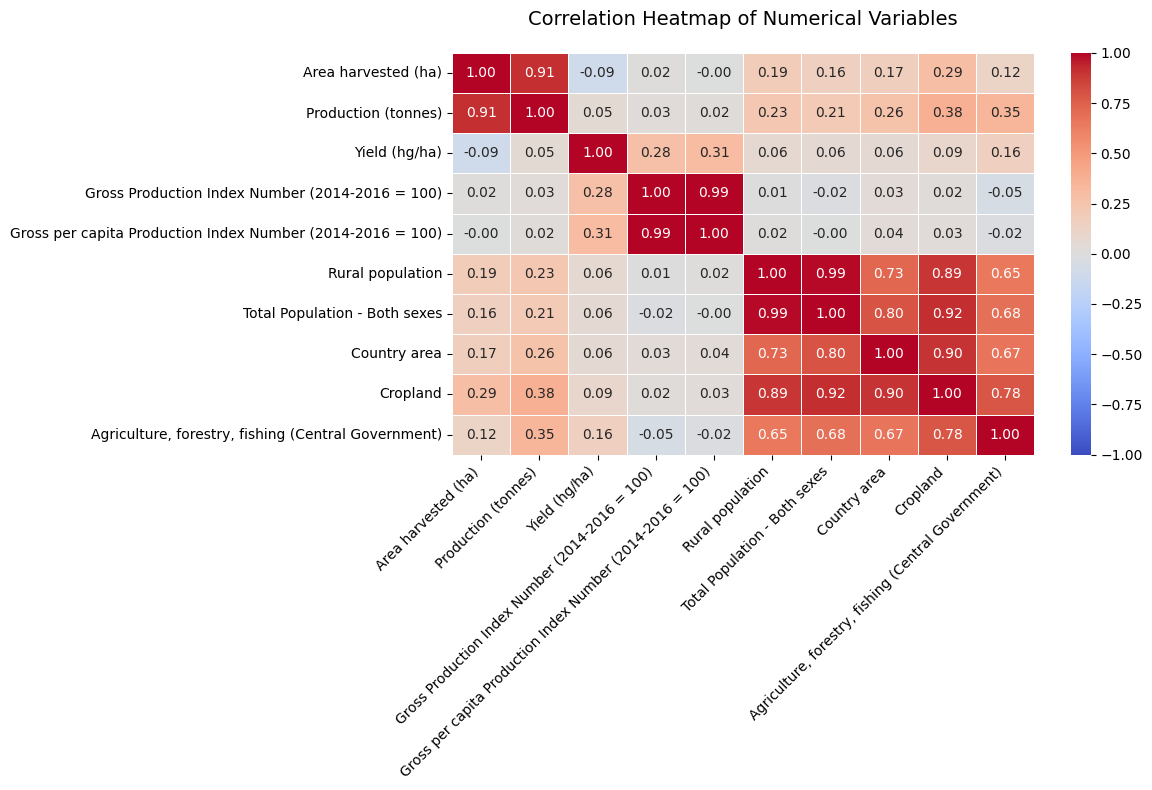

In [76]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=True,   
            cmap='coolwarm',  
            vmin=-1, vmax=1,  
            linewidths=0.5,   
            fmt=".2f",)  

plt.title("Correlation Heatmap of Numerical Variables", pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

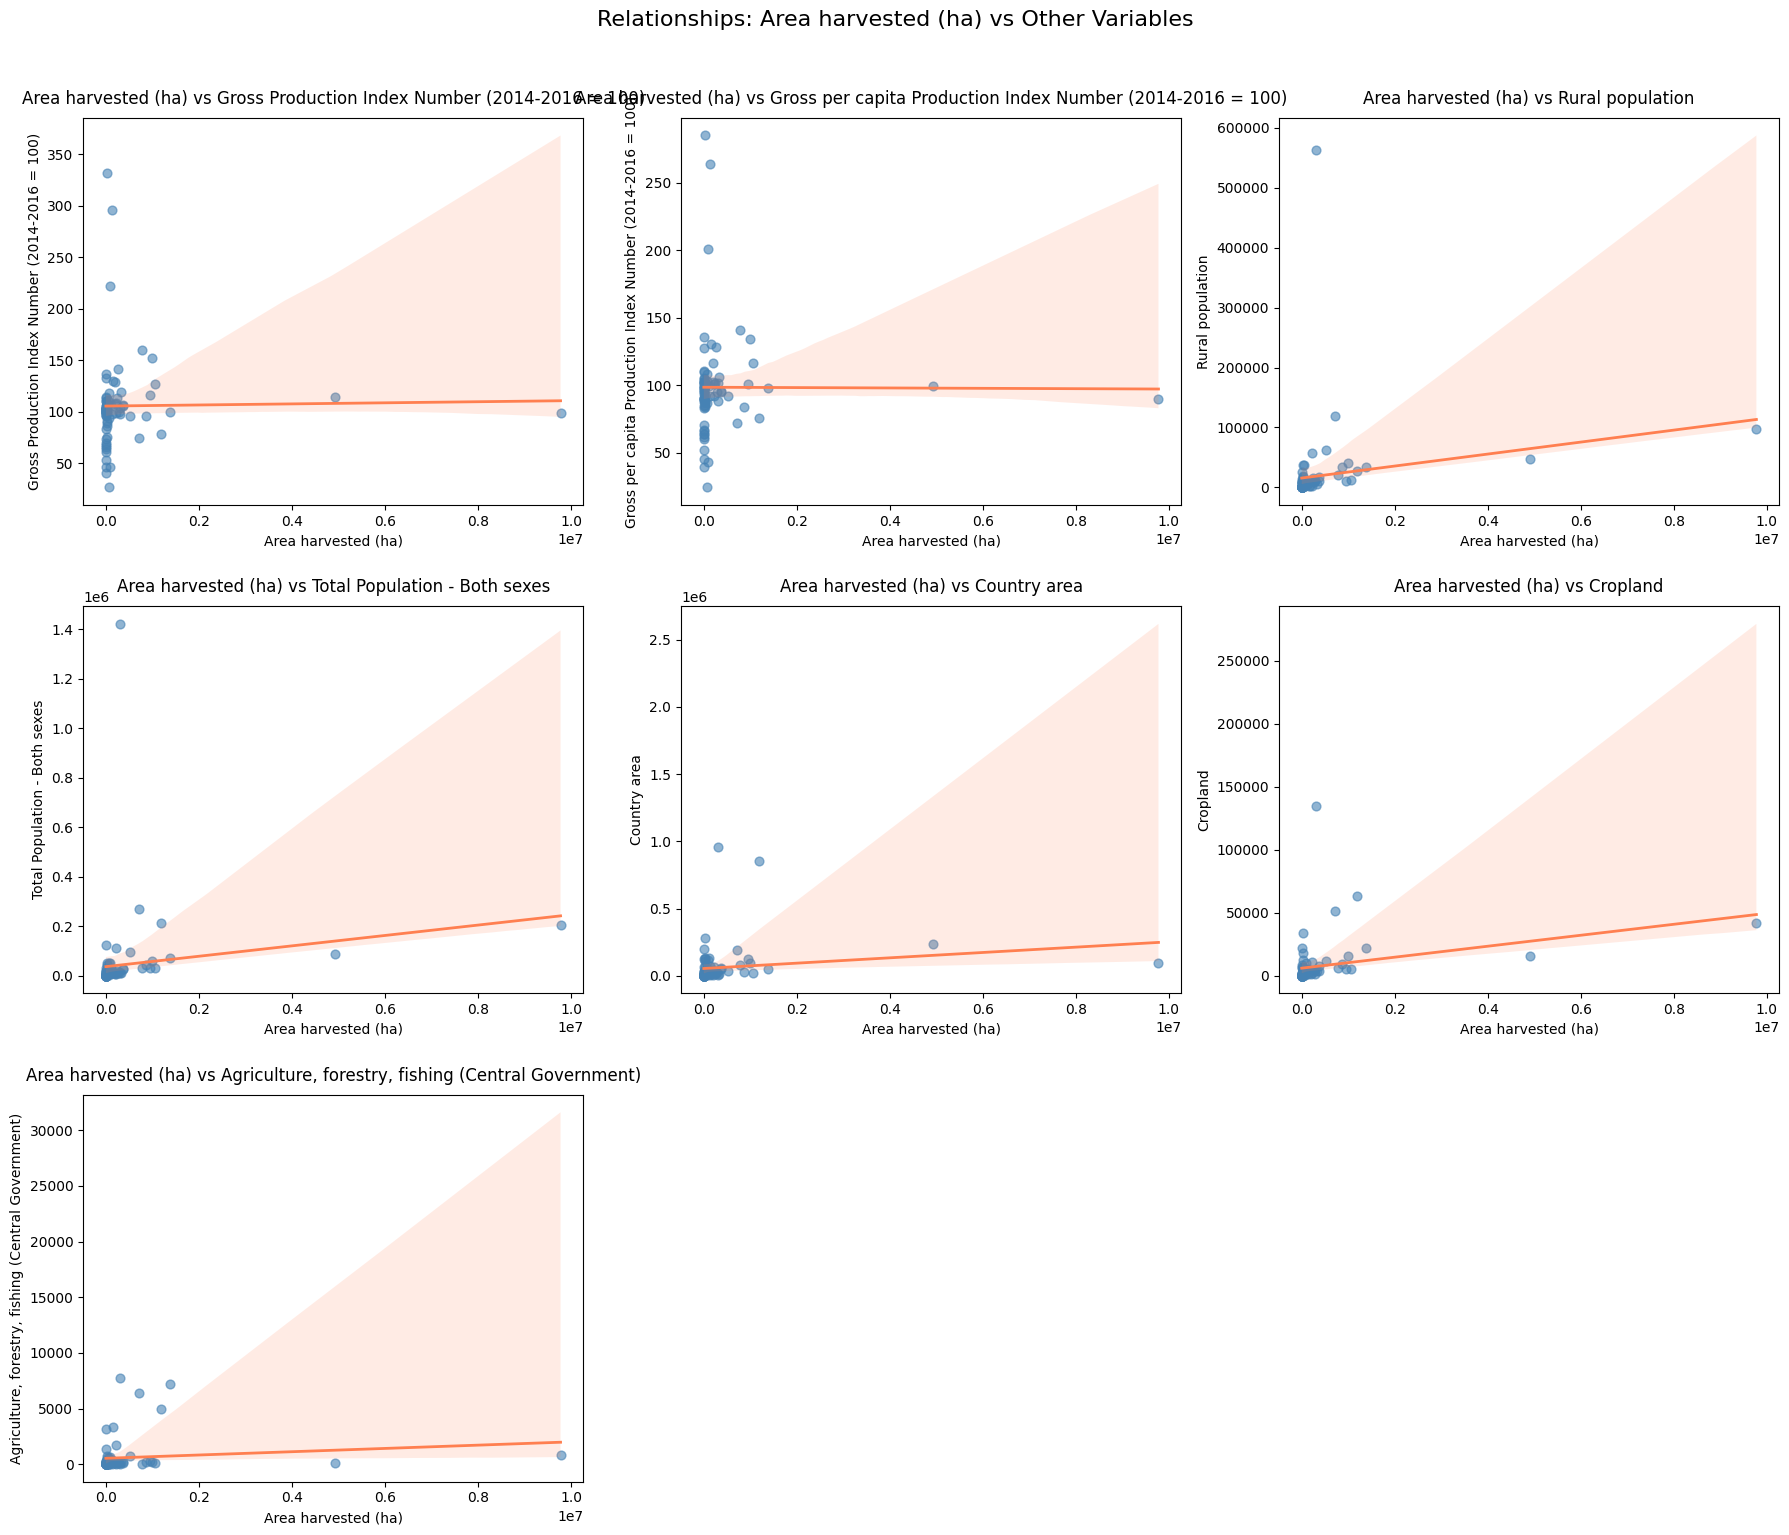

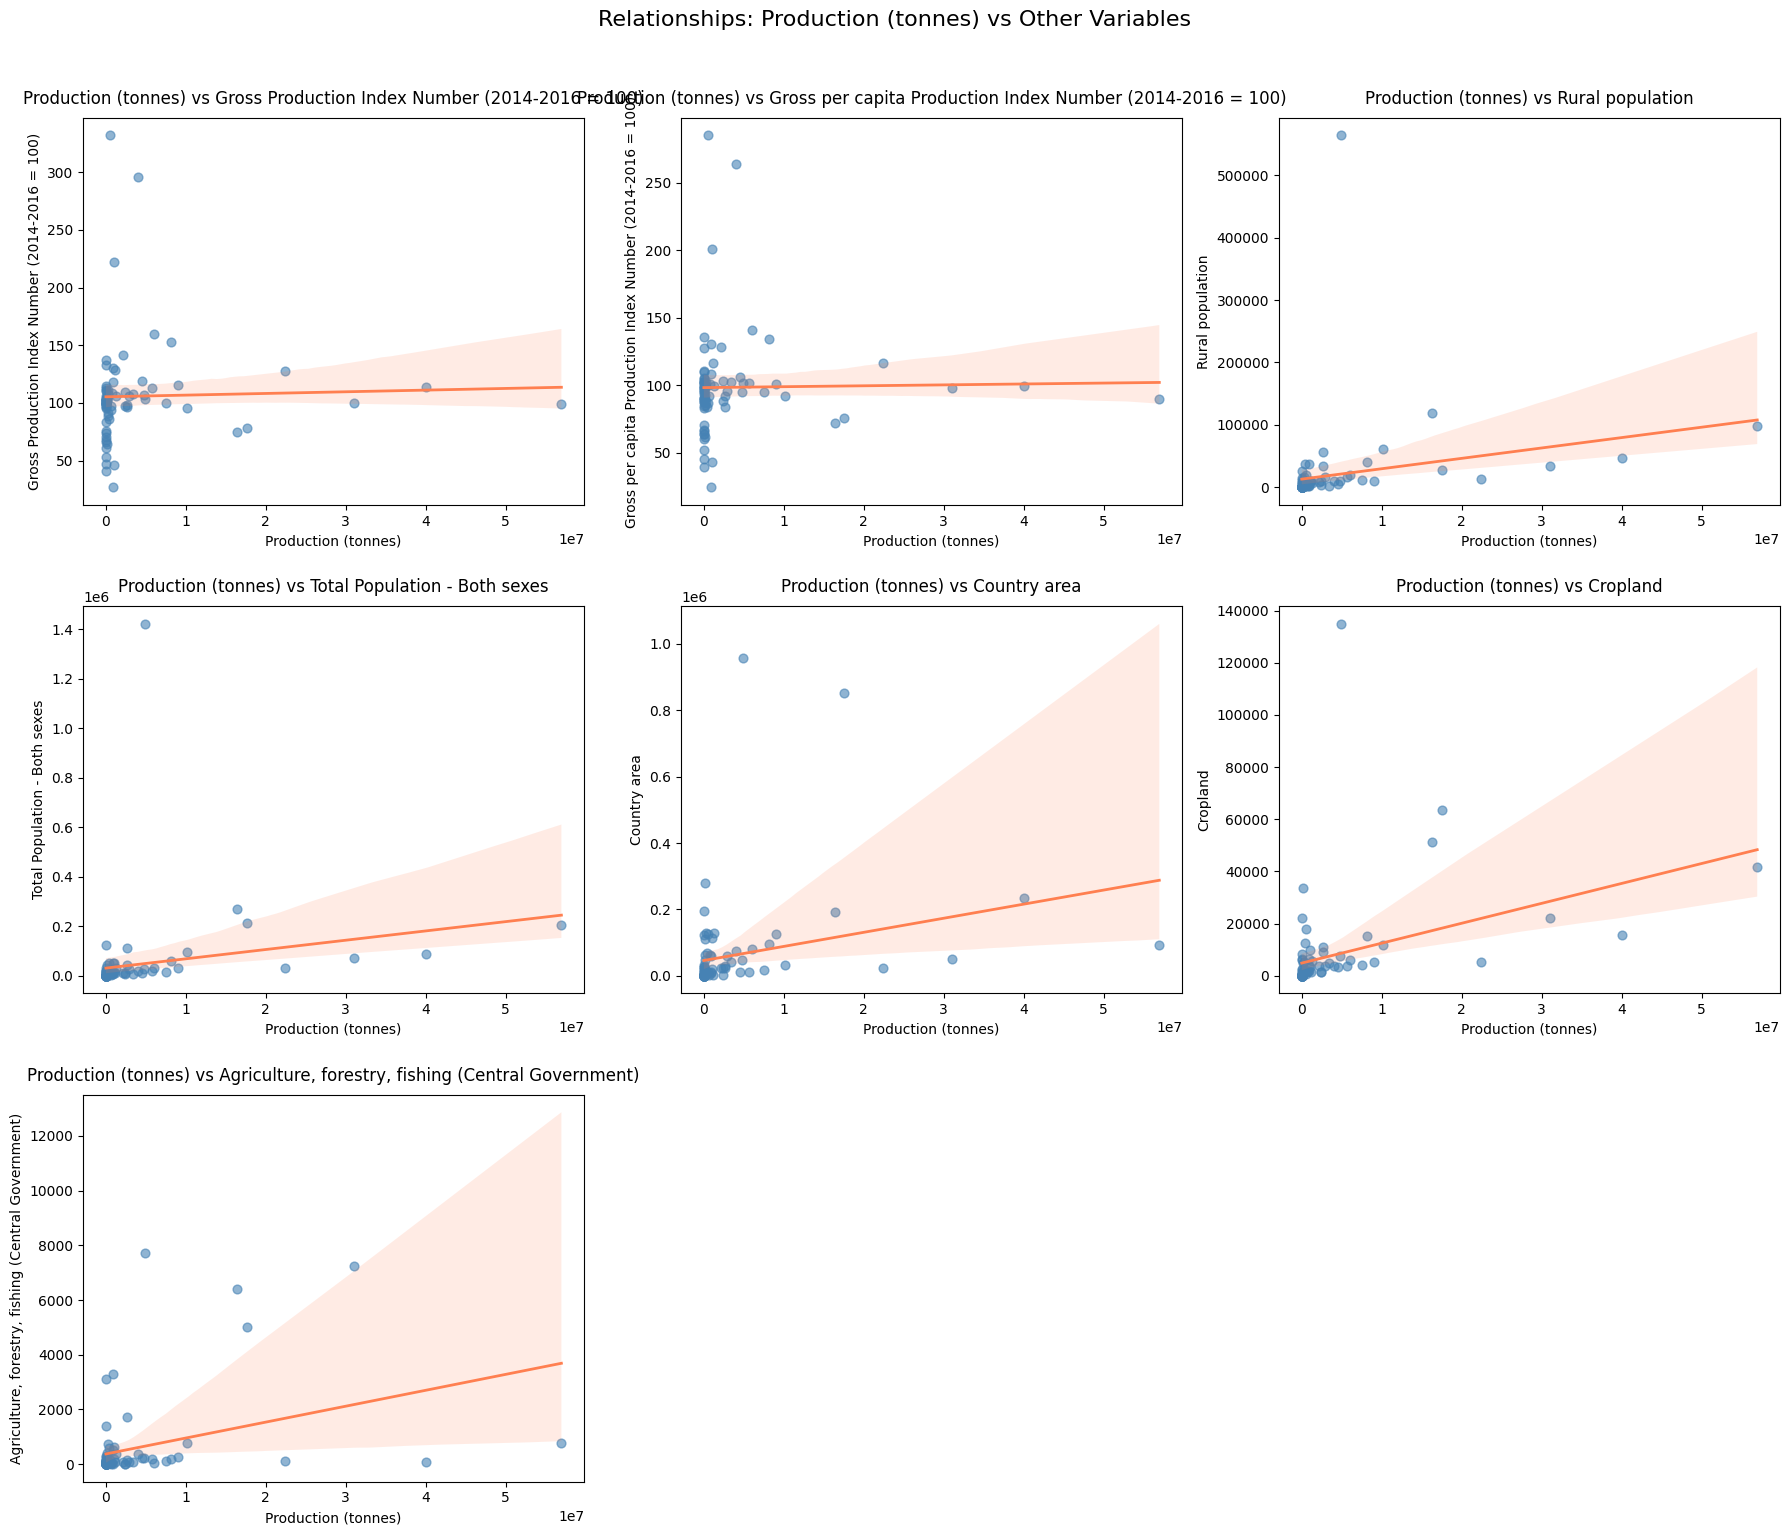

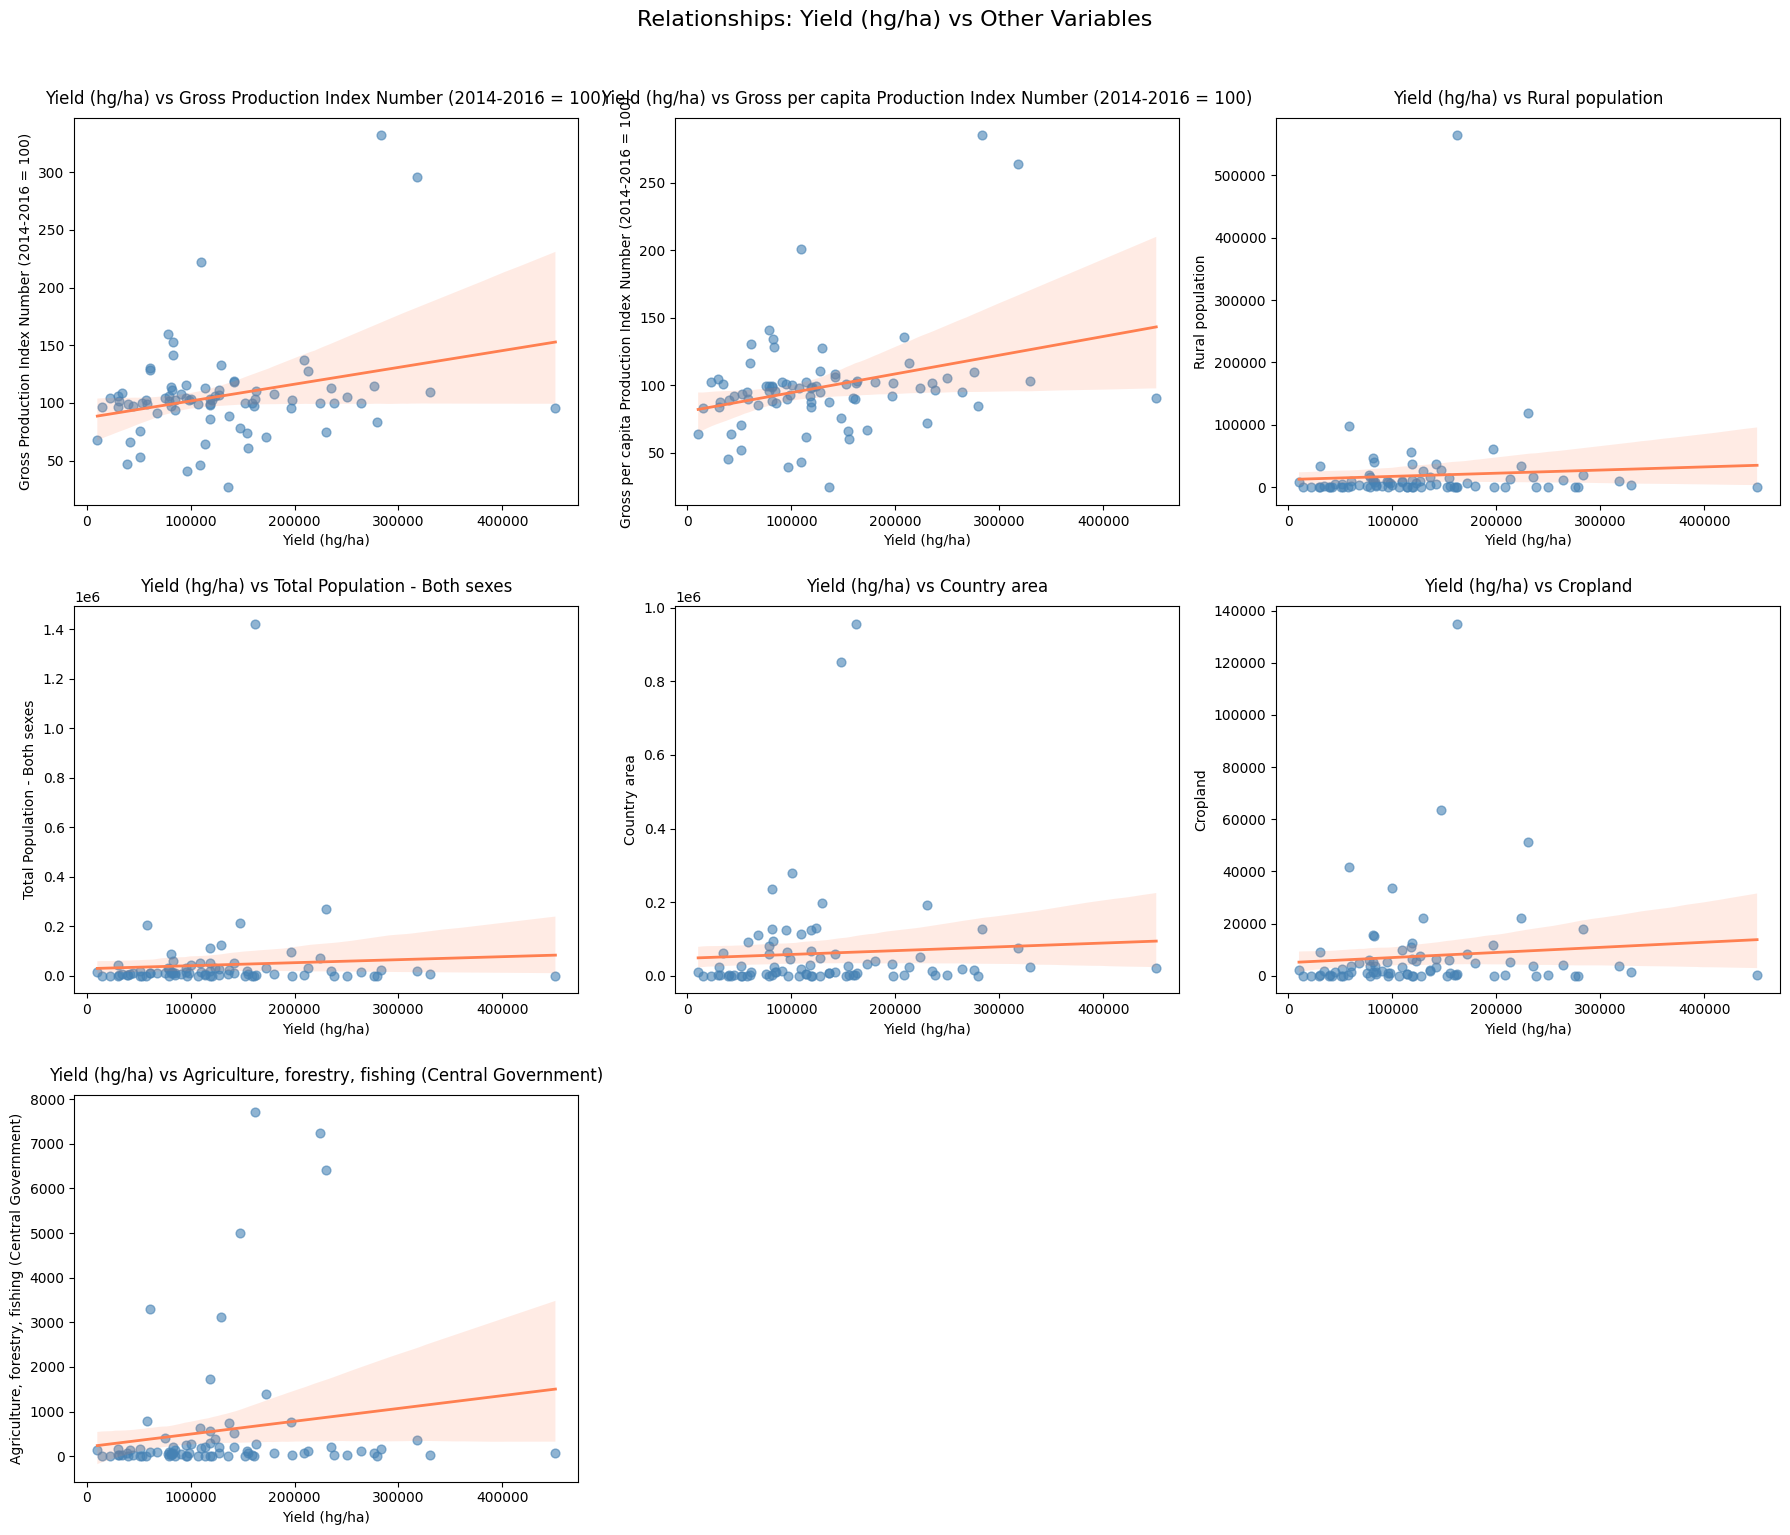

In [84]:
# Primary variables of interest
primary_vars = ['Area harvested (ha)', 'Production (tonnes)', 'Yield (hg/ha)']
other_numerical = [col for col in numerical_df if col not in primary_vars]

# Create one figure per primary variable
for primary_var in primary_vars:
    n_plots = len(other_numerical)
    n_rows = math.ceil(n_plots / 3)  # Maximum 3 plots per row
    
    # Create figure with subplots (rows x 3 columns)
    fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
    fig.suptitle(f'Relationships: {primary_var} vs Other Variables', y=1.02, fontsize=16)
    
    # Flatten axes array for easy iteration
    axes = axes.flatten()
    
    # Create each scatter plot
    for i, col in enumerate(other_numerical):
        sns.regplot(data=df, x=primary_var, y=col, ax=axes[i],
                   scatter_kws={'alpha': 0.6, 's': 40, 'color': 'steelblue'},
                   line_kws={'color': 'coral', 'linewidth': 2})
        axes[i].set_title(f'{primary_var} vs {col}', pad=10)
        axes[i].set_xlabel(primary_var, fontsize=10)
        axes[i].set_ylabel(col, fontsize=10)
    
    # Hide any empty subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()


Analyzing Country Group: Africa


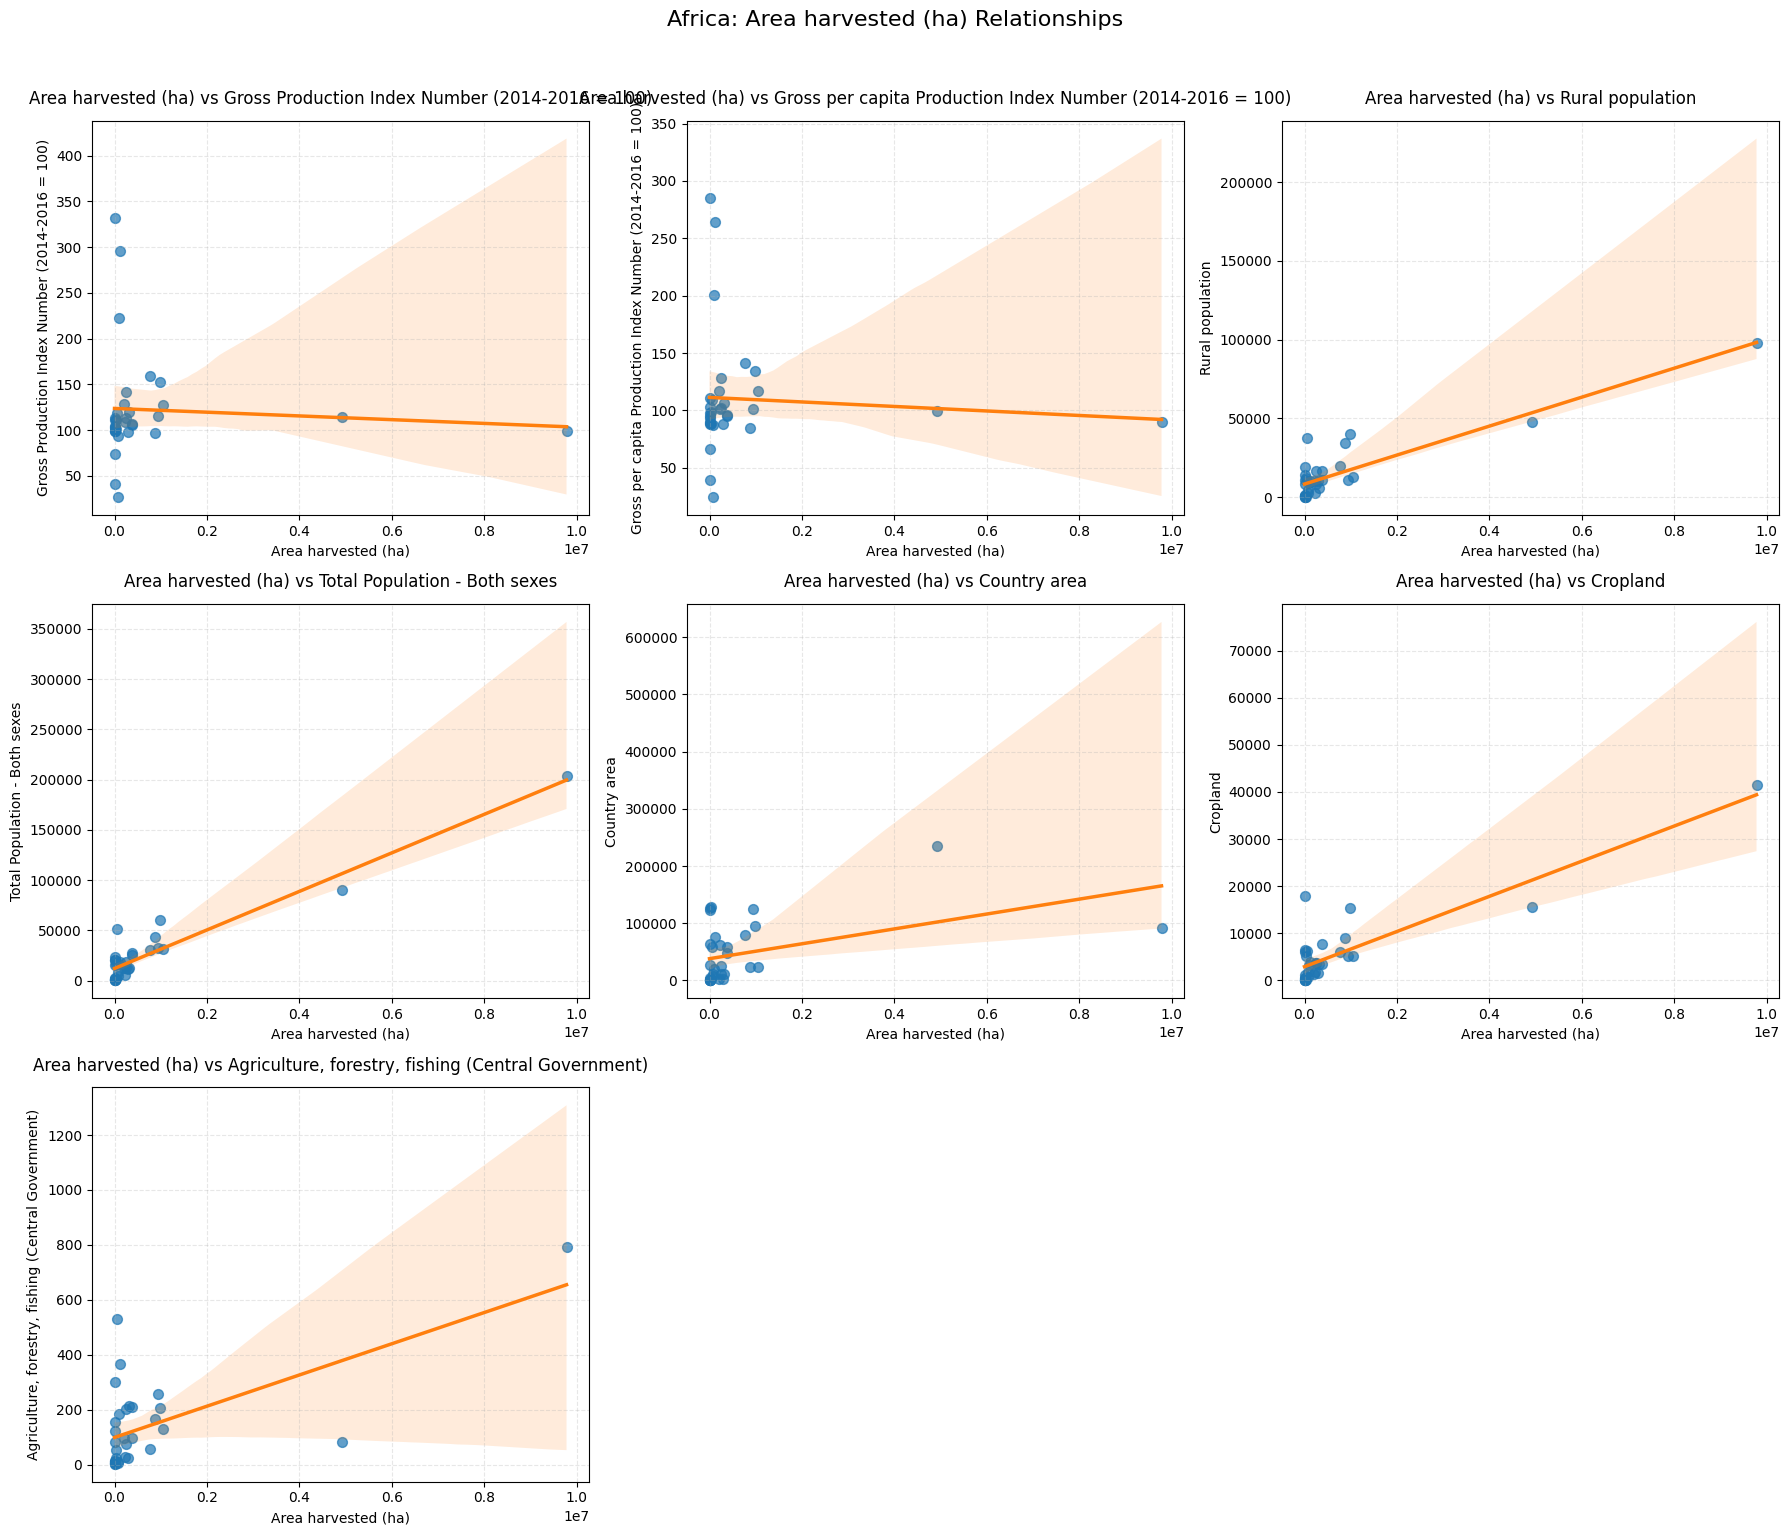

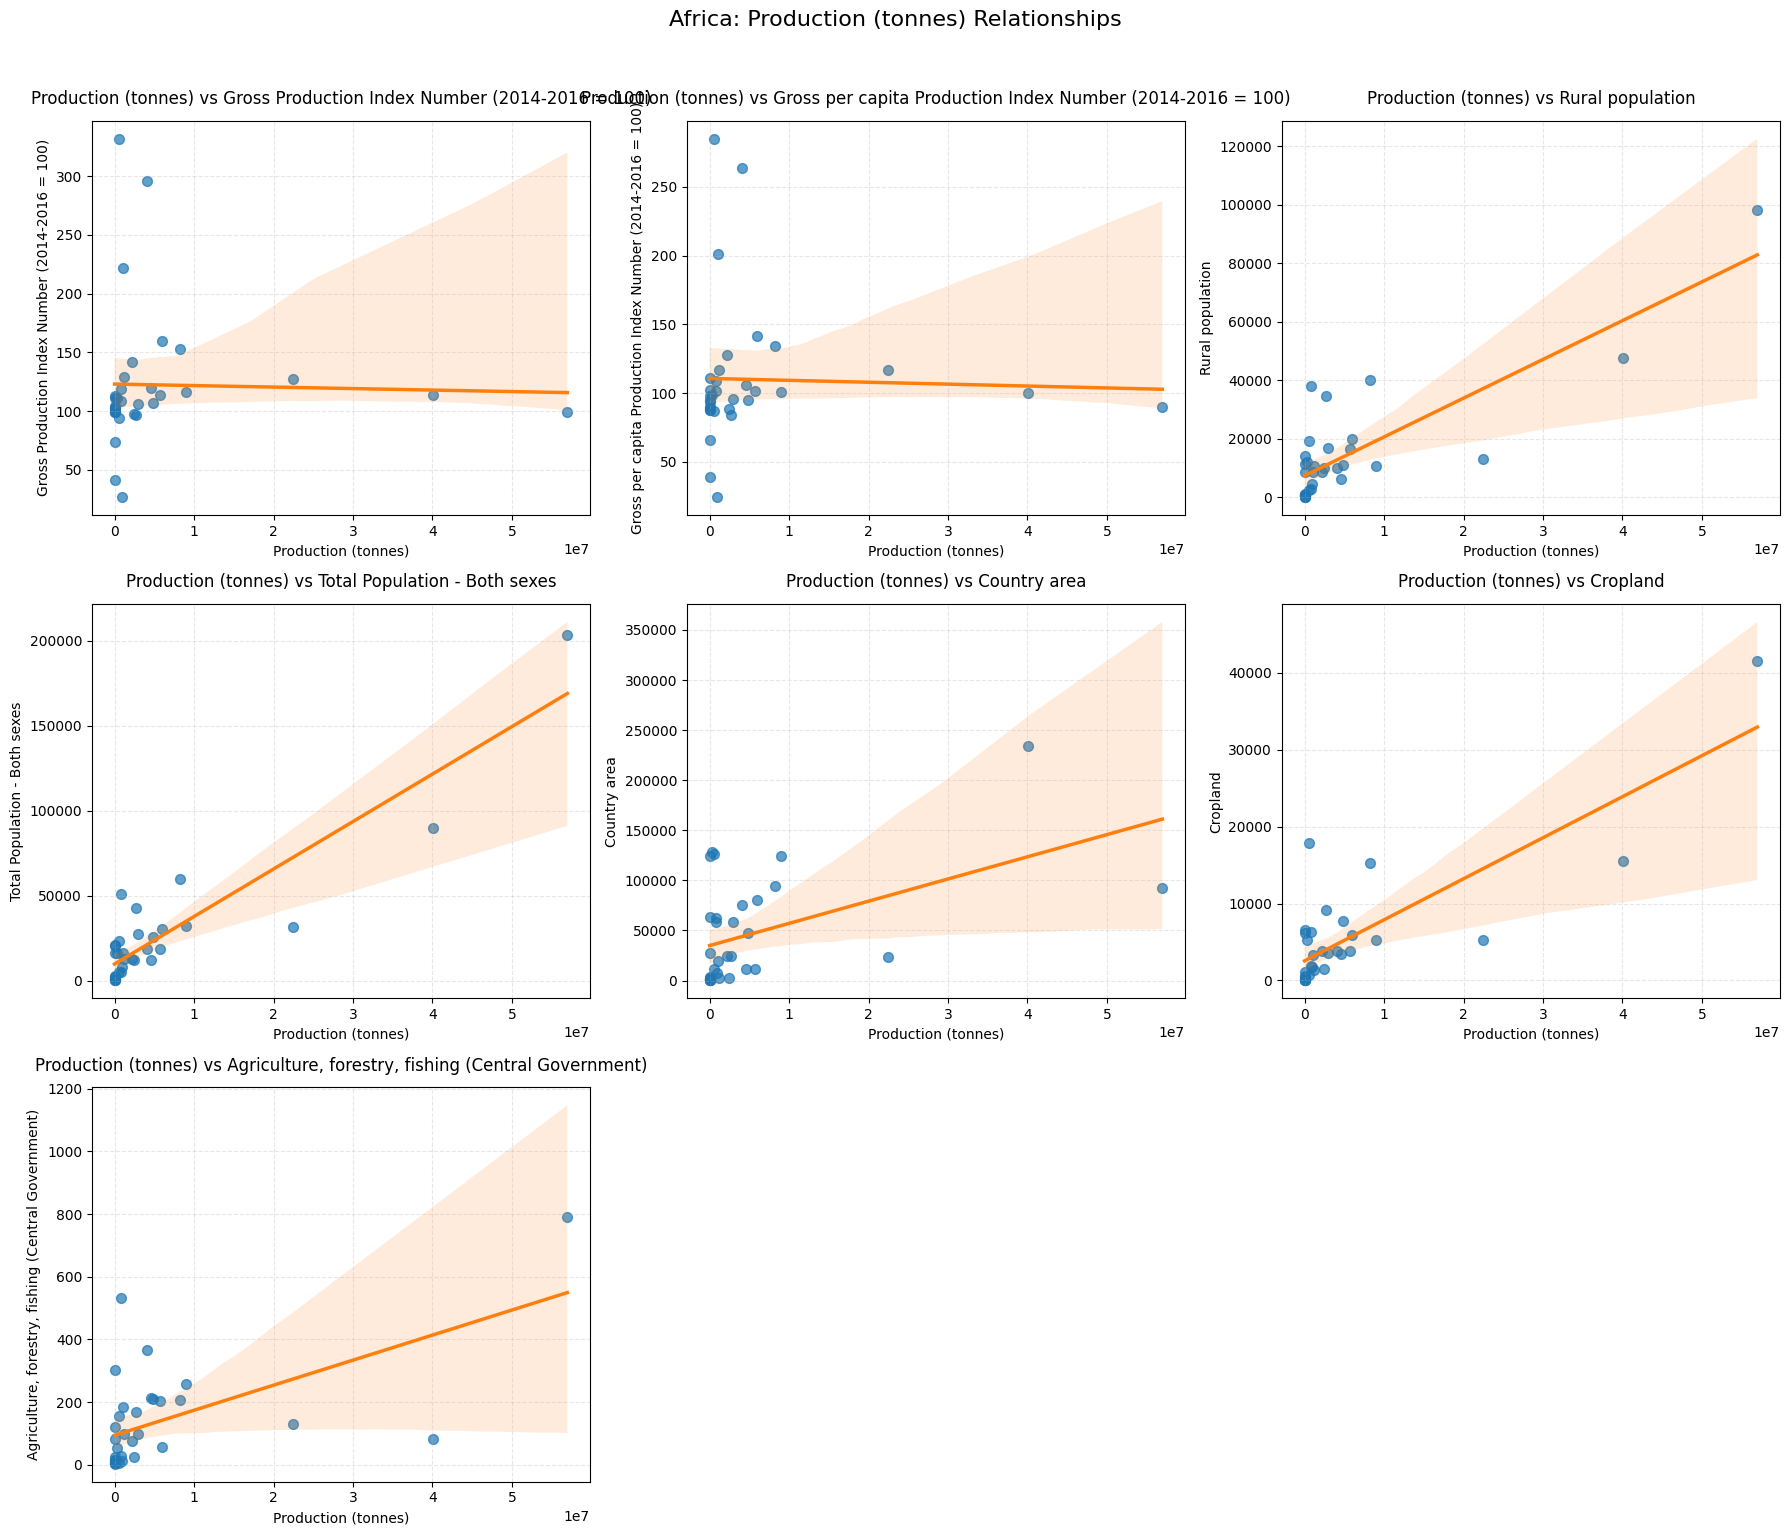

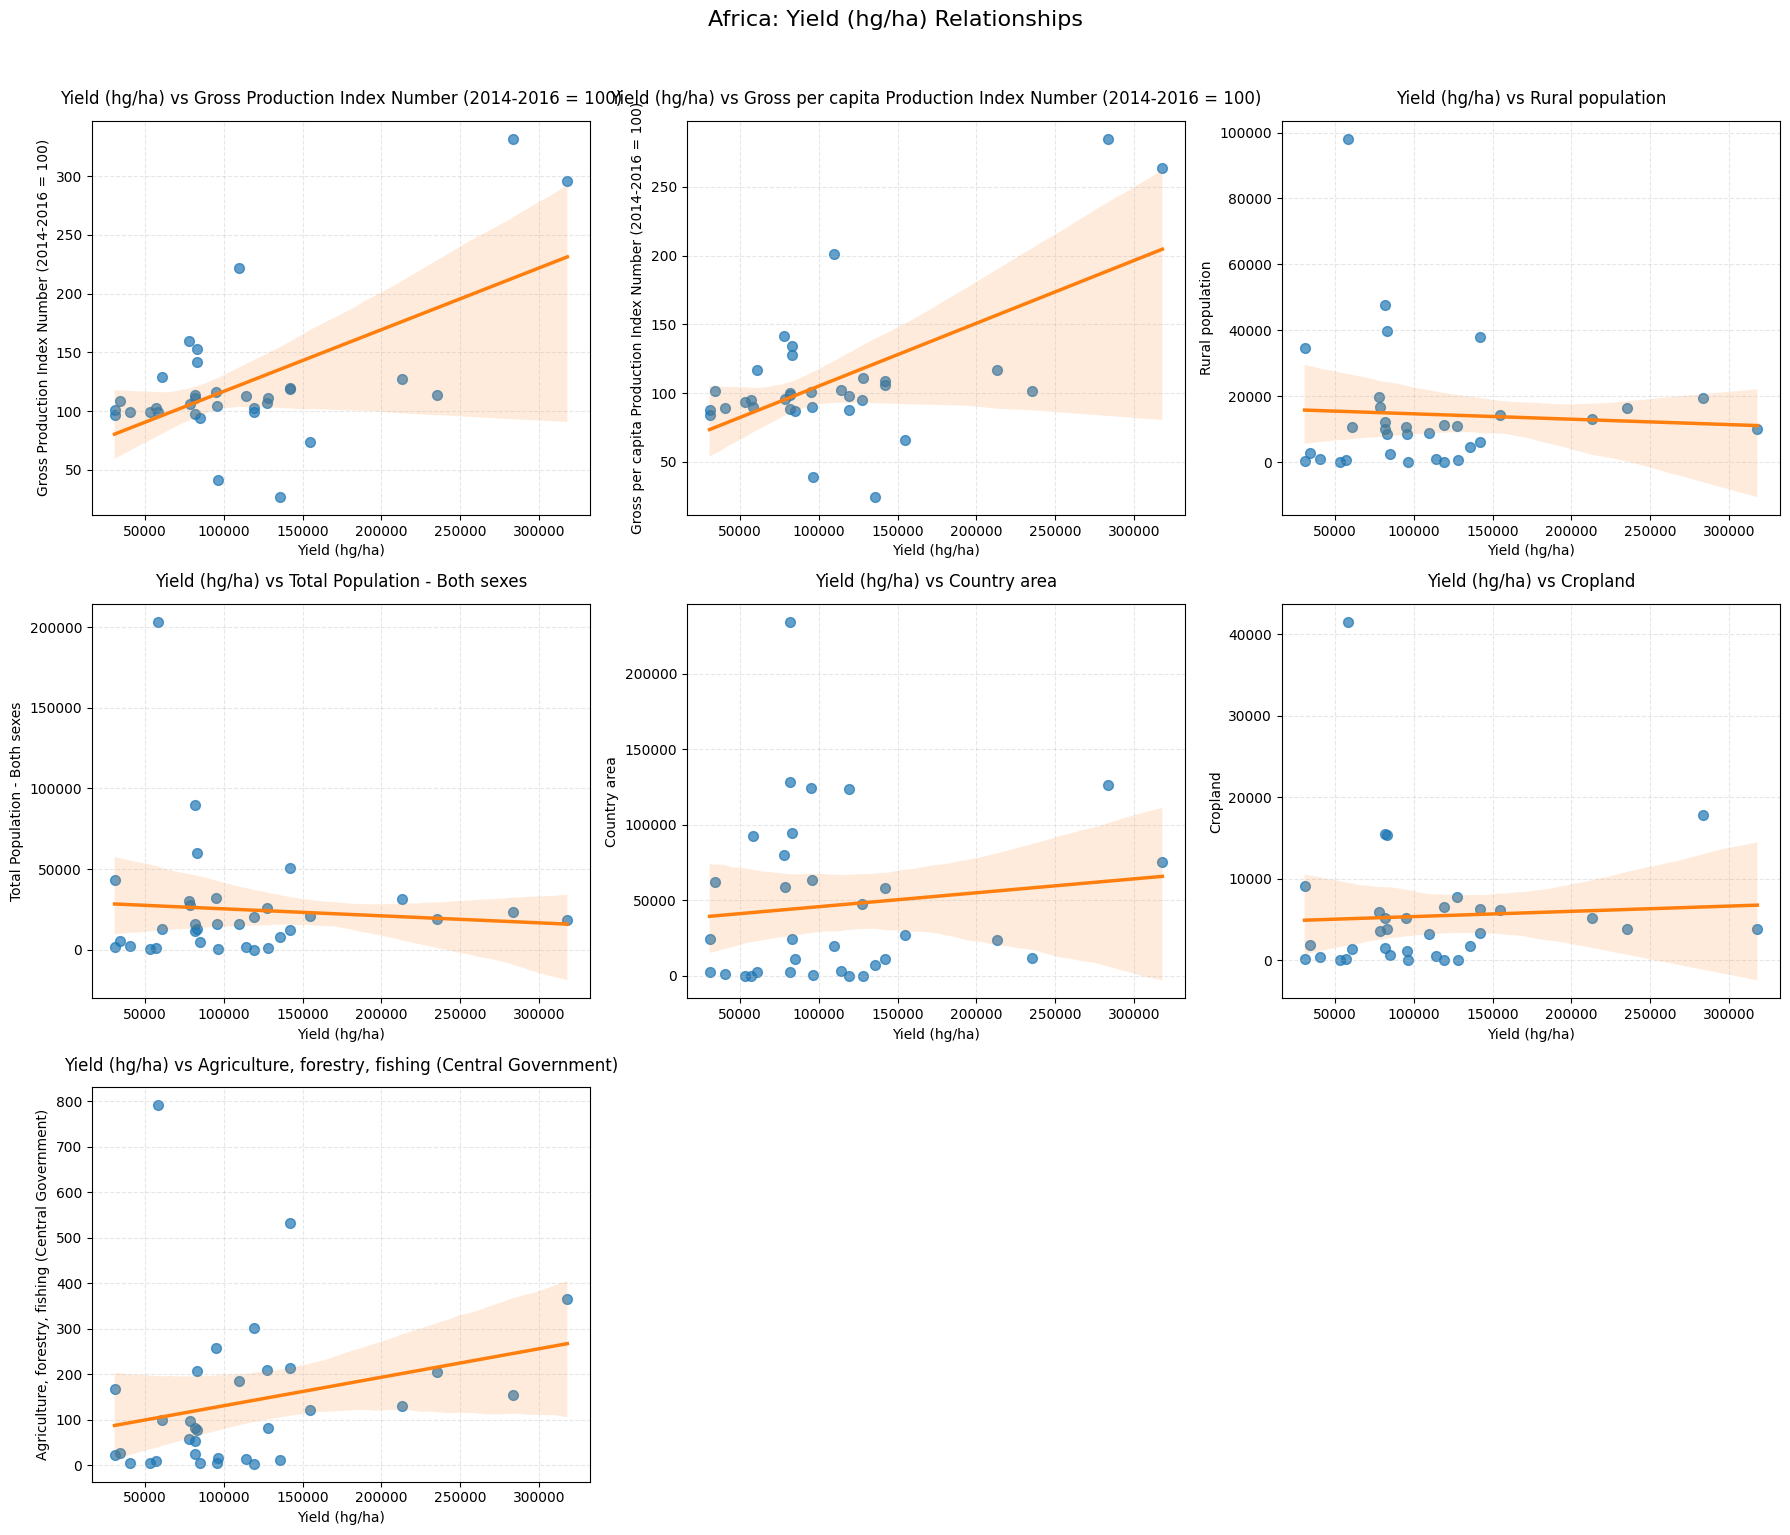


Analyzing Country Group: Americas


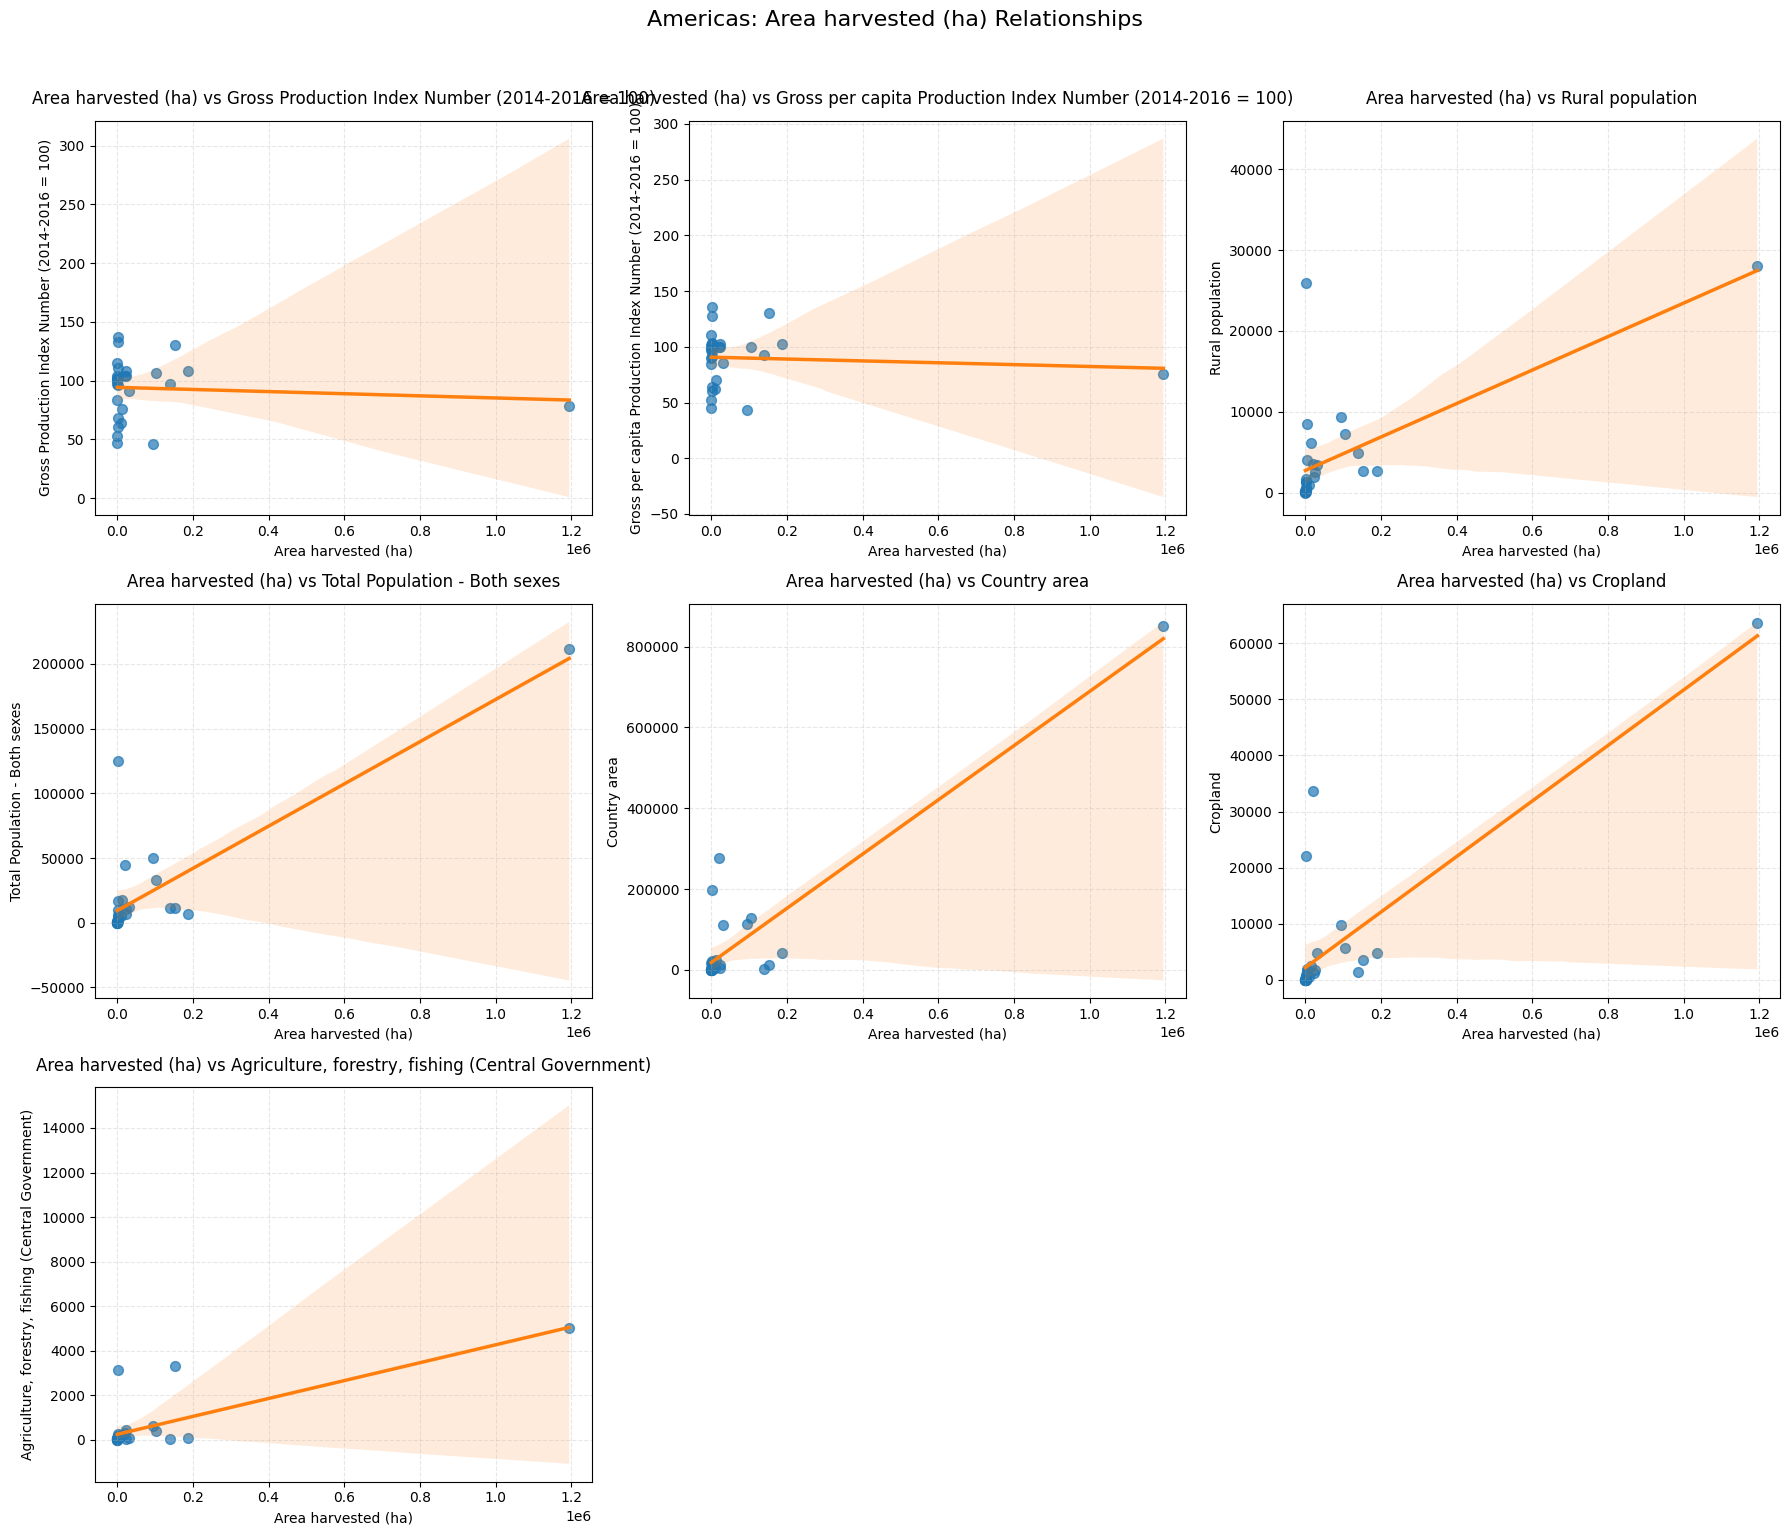

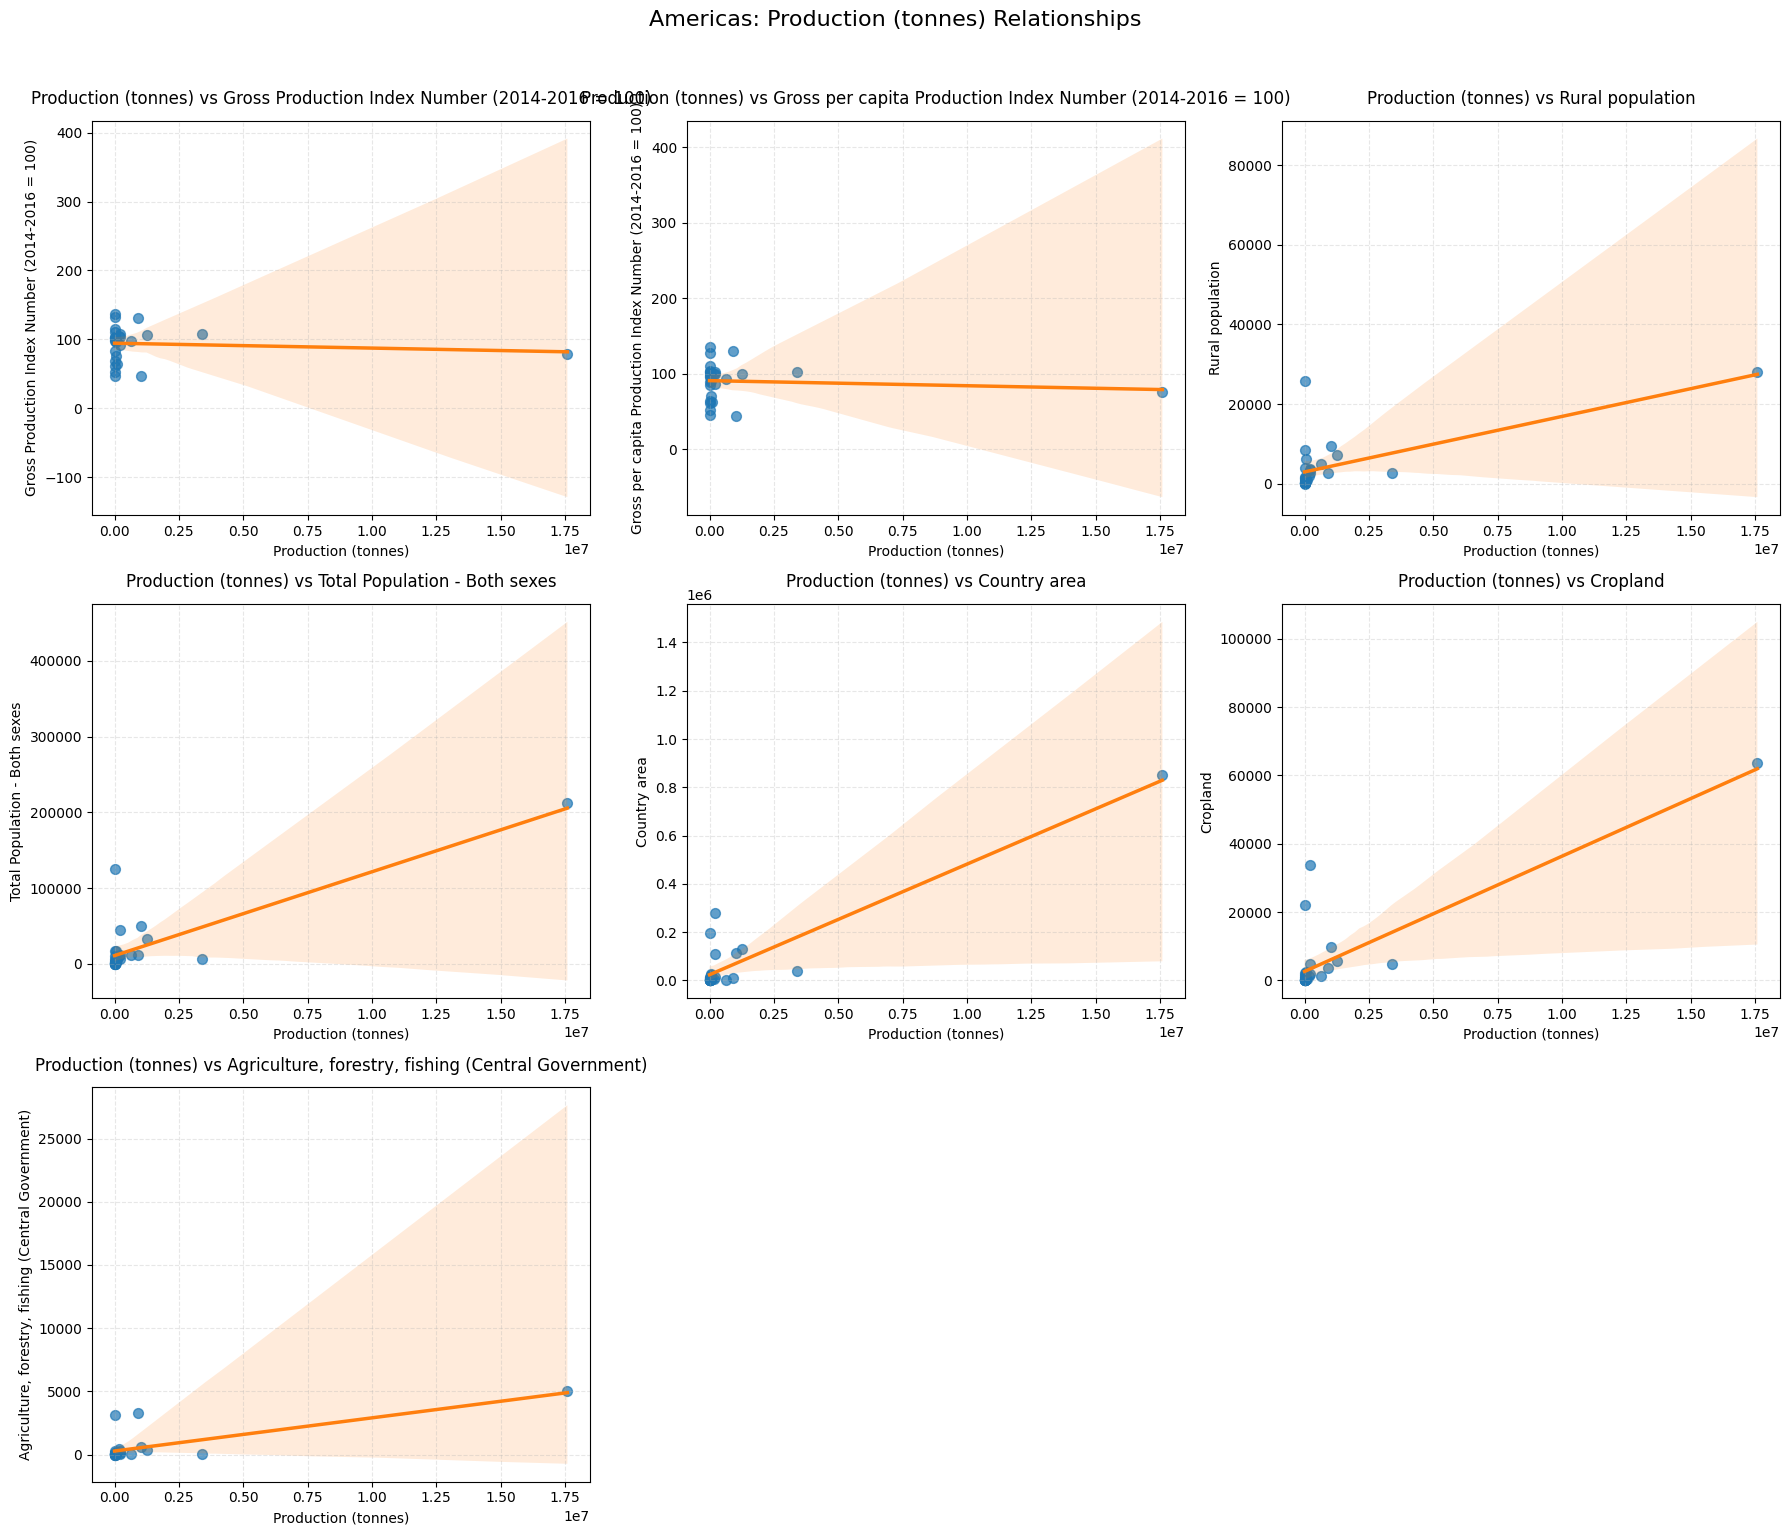

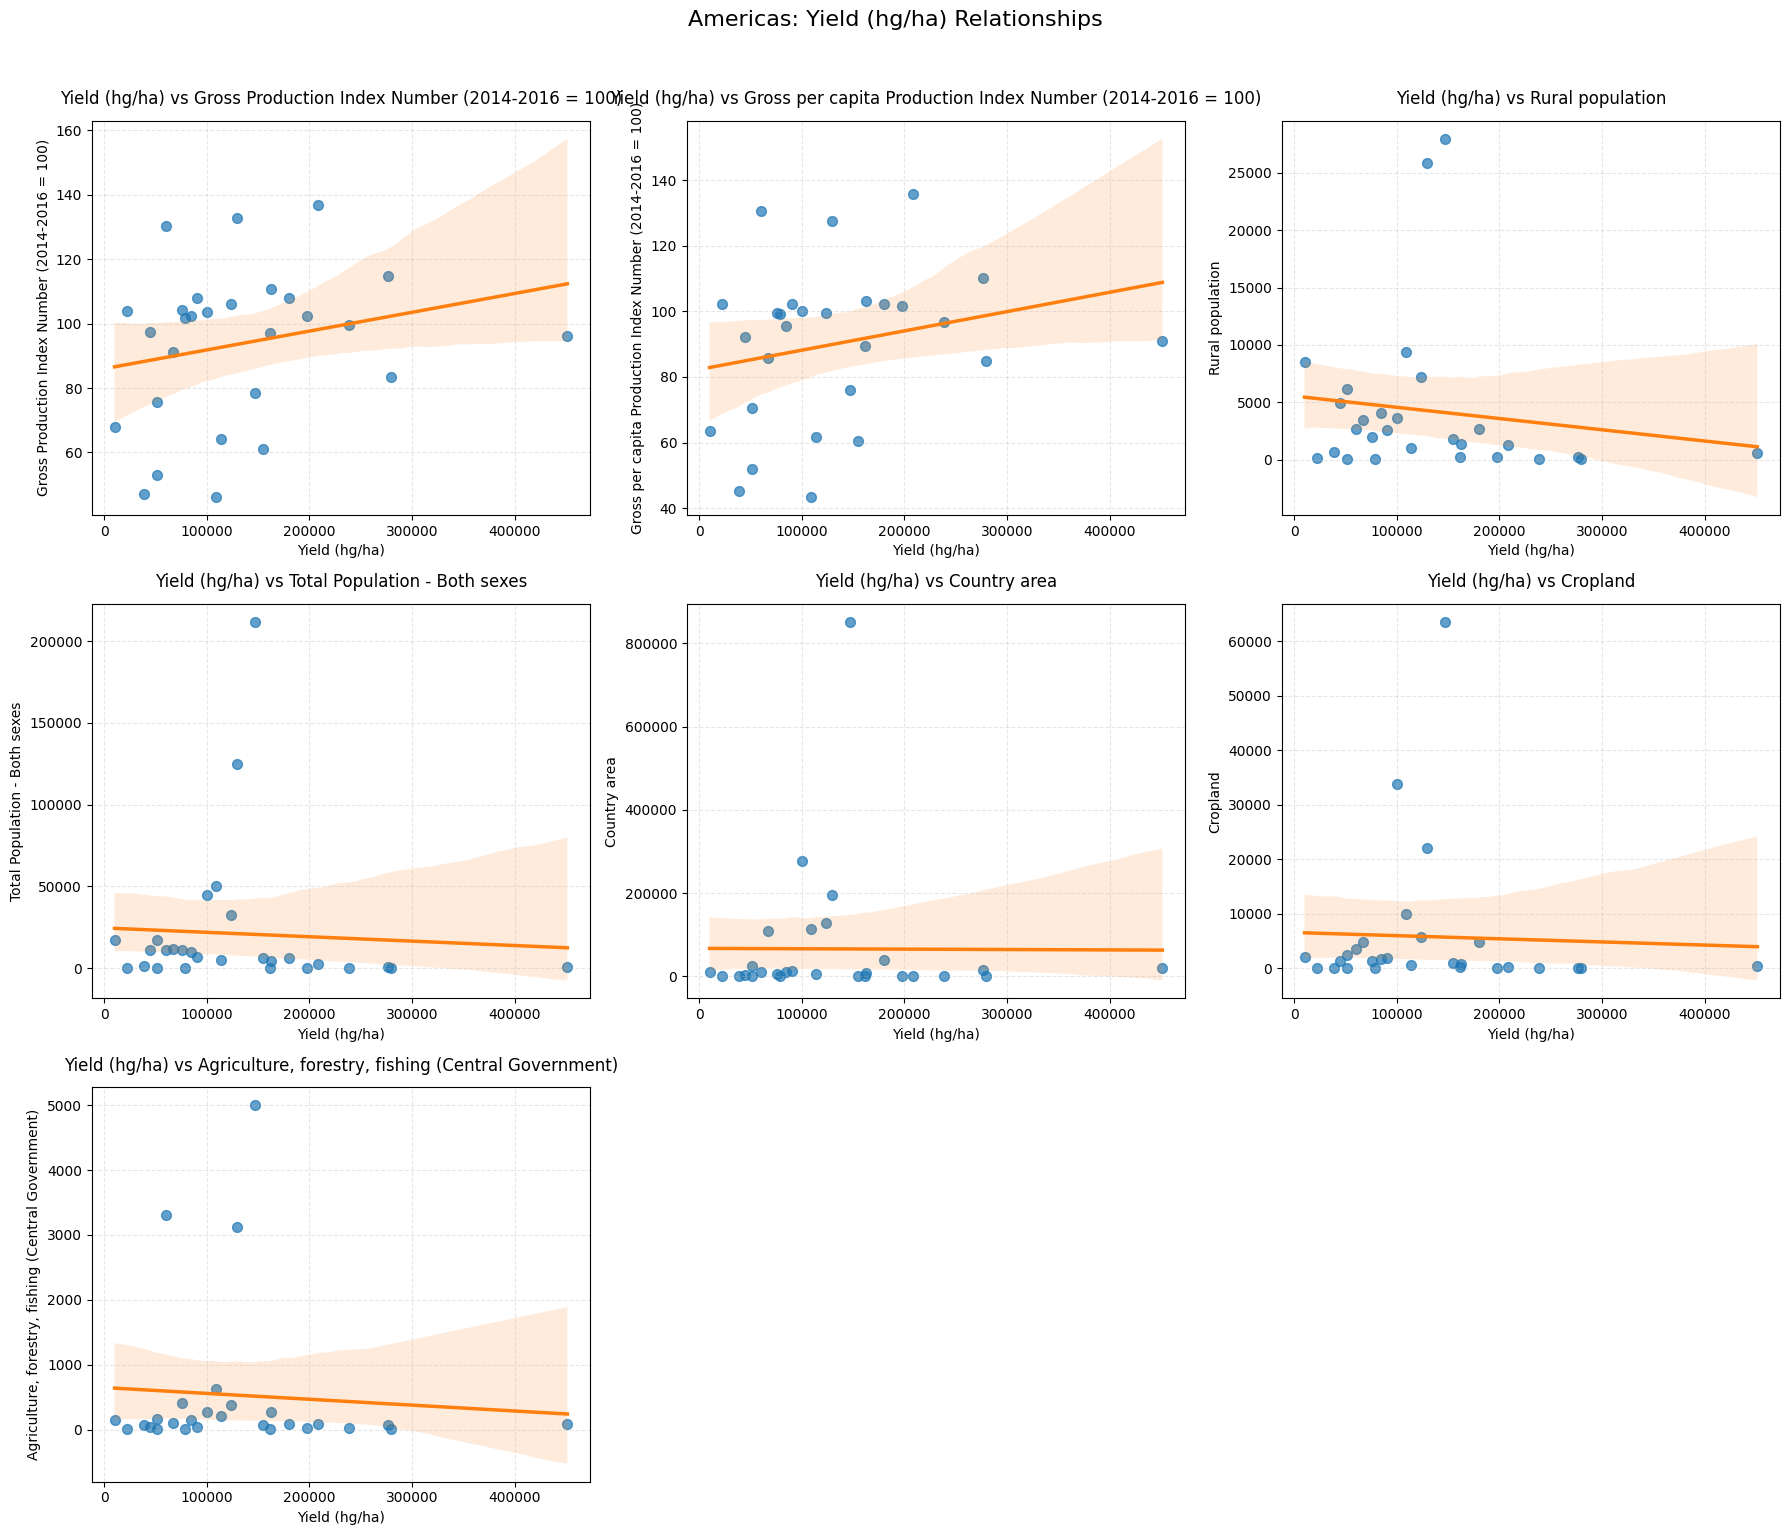


Analyzing Country Group: Asia


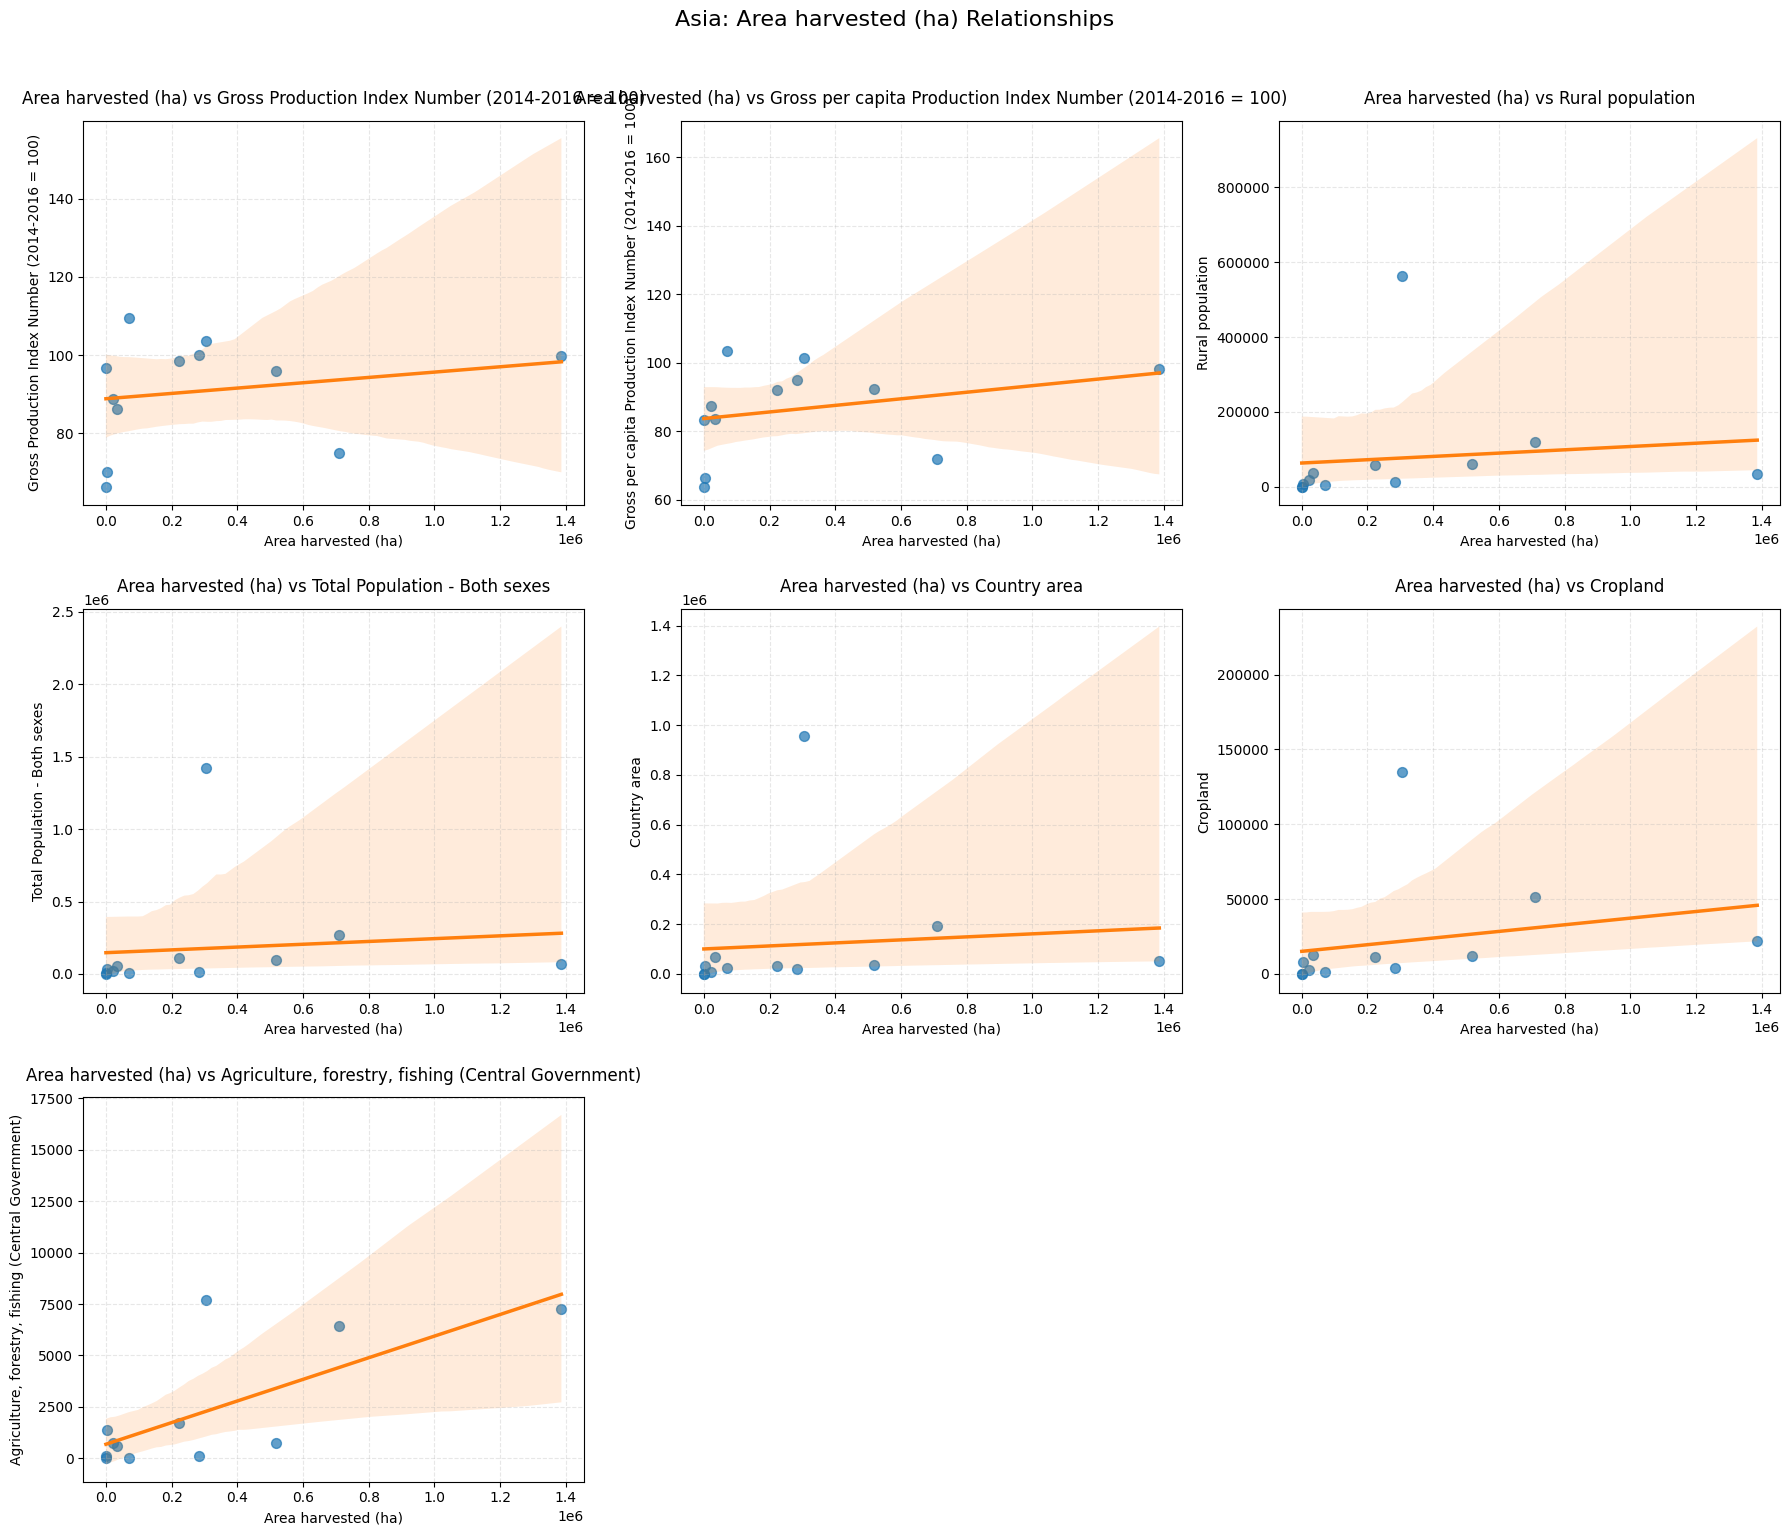

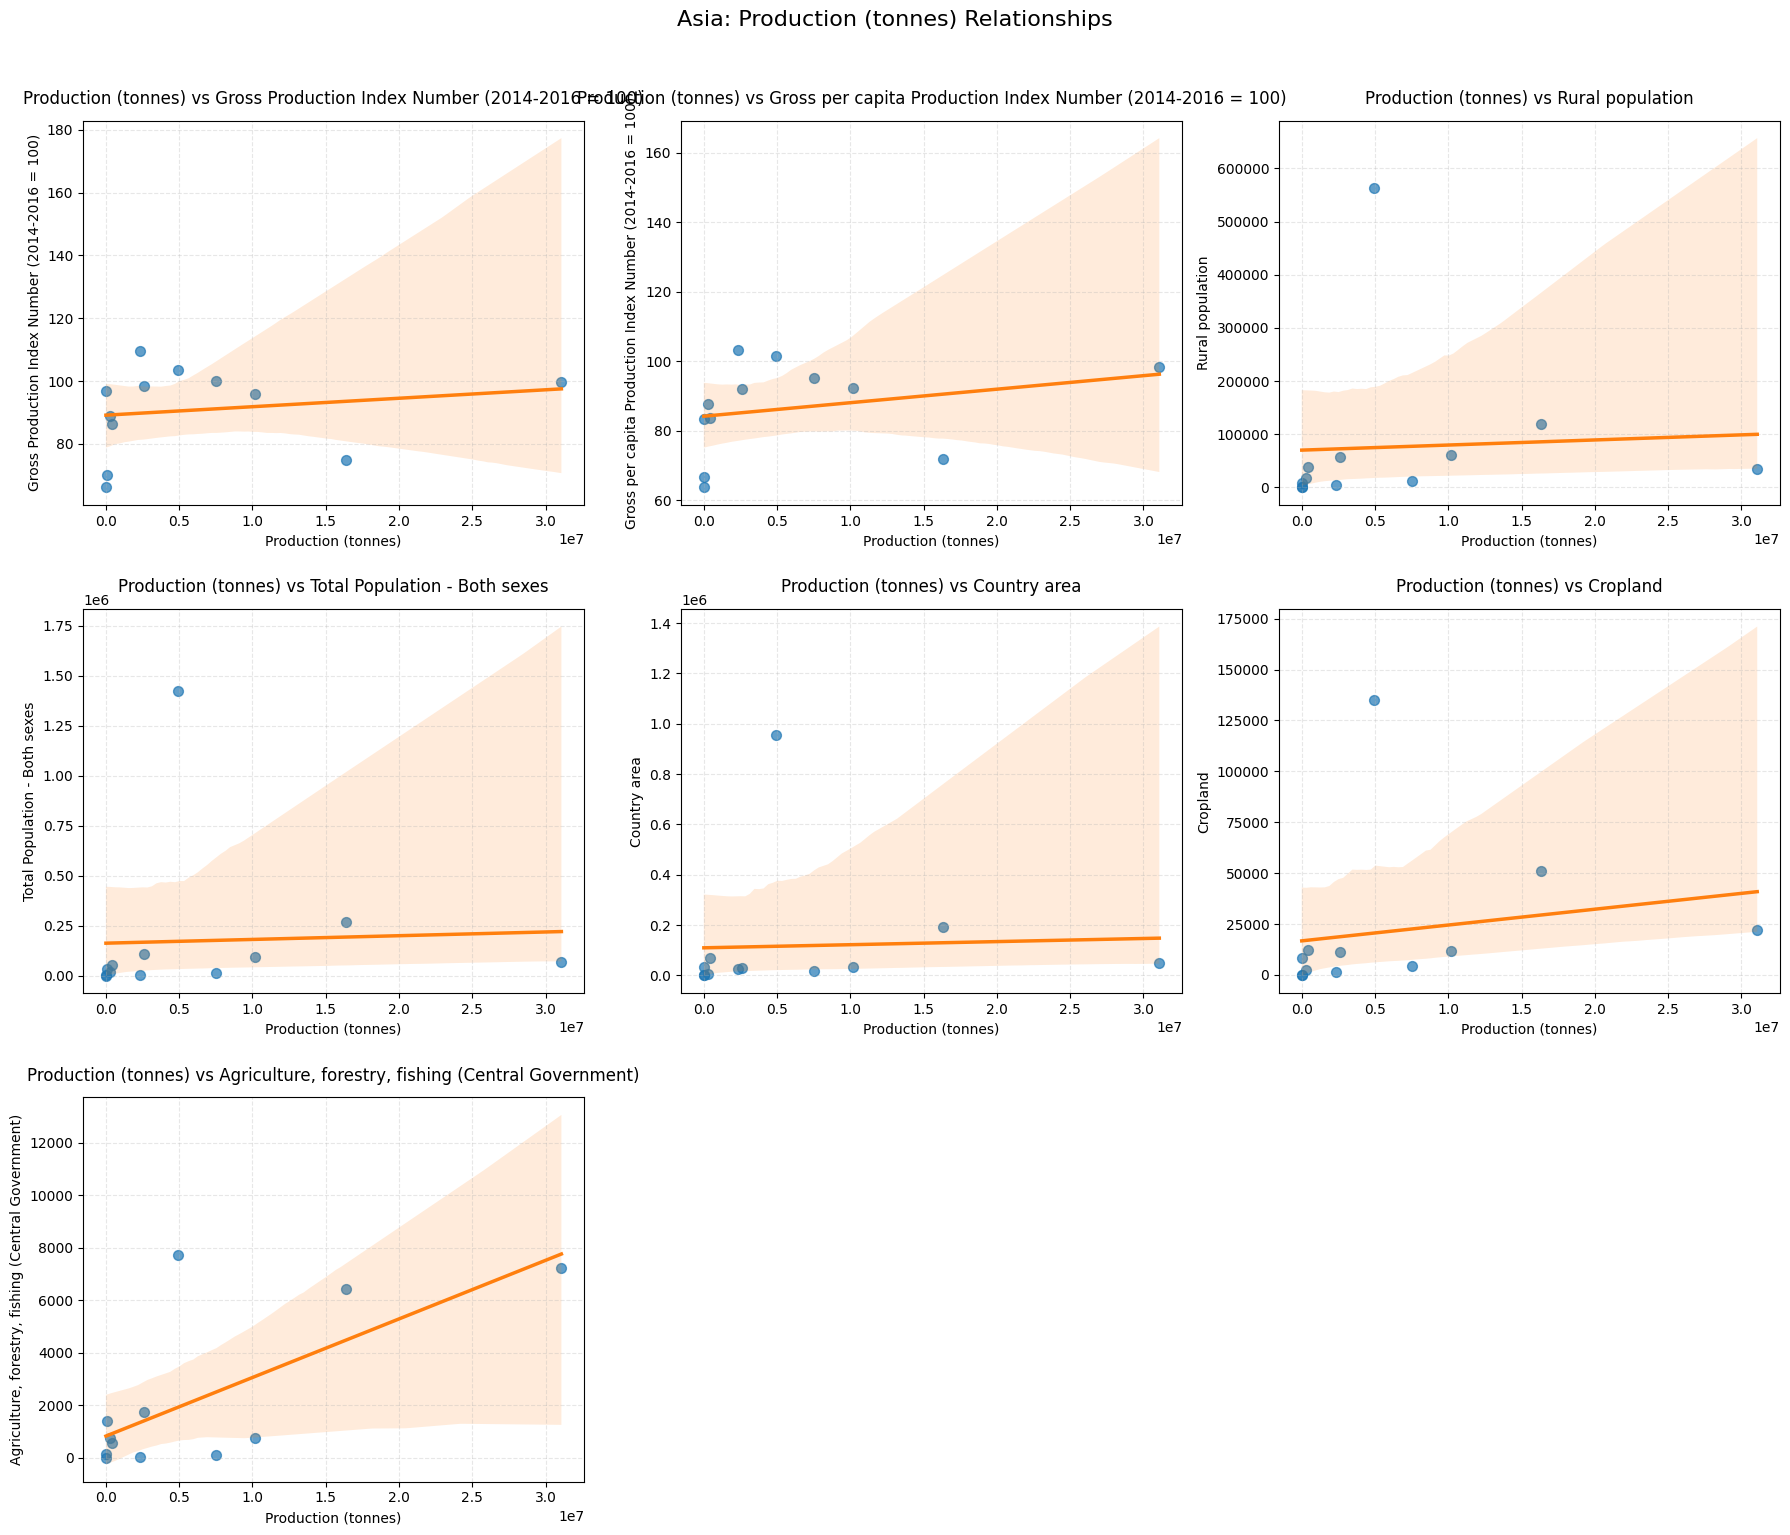

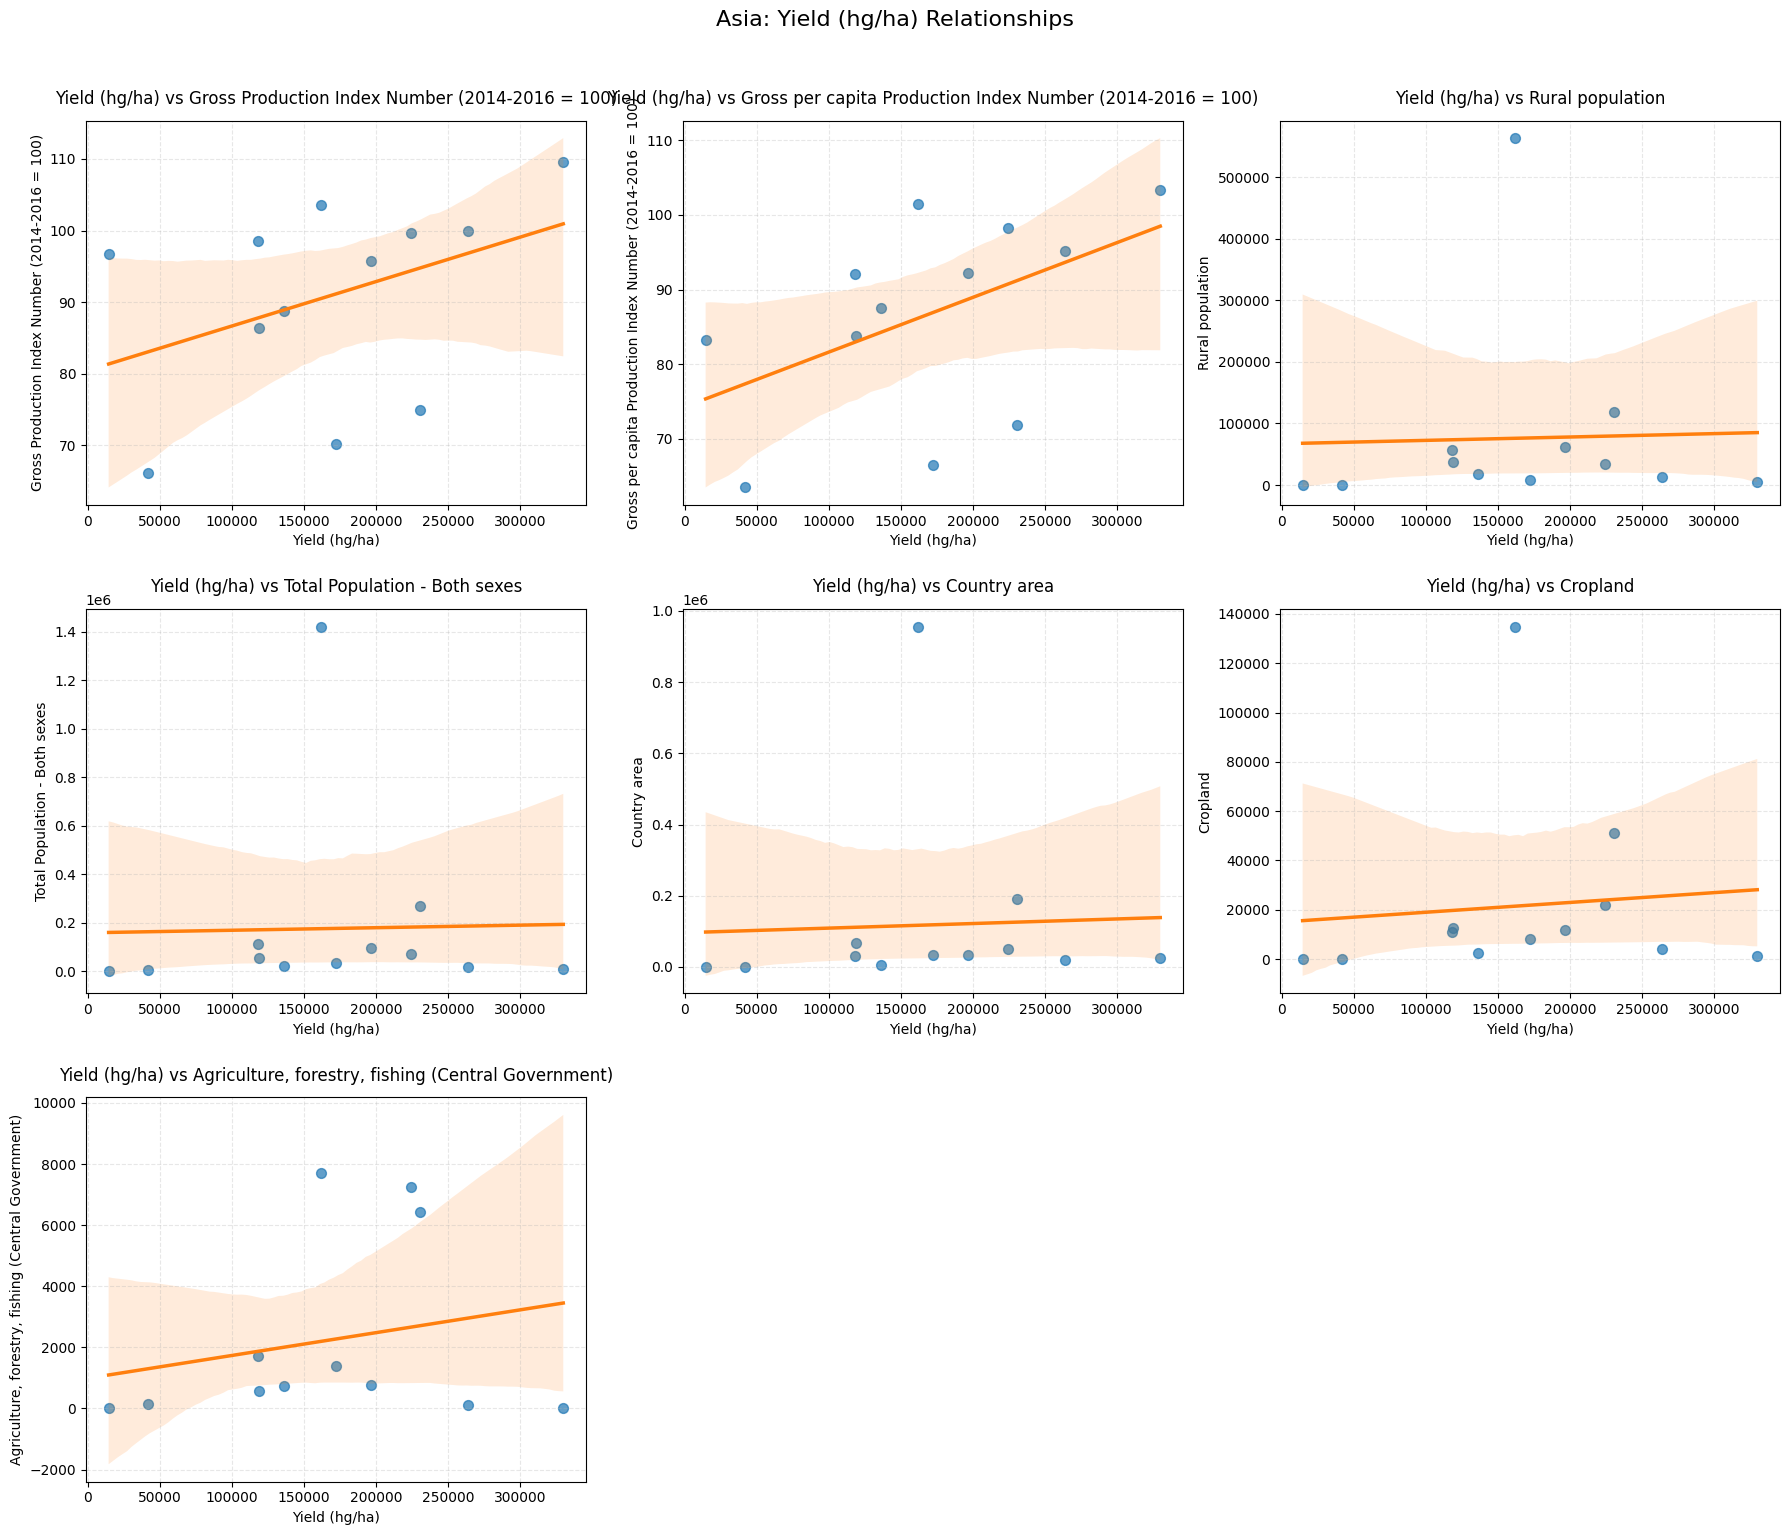


Analyzing Country Group: Oceania


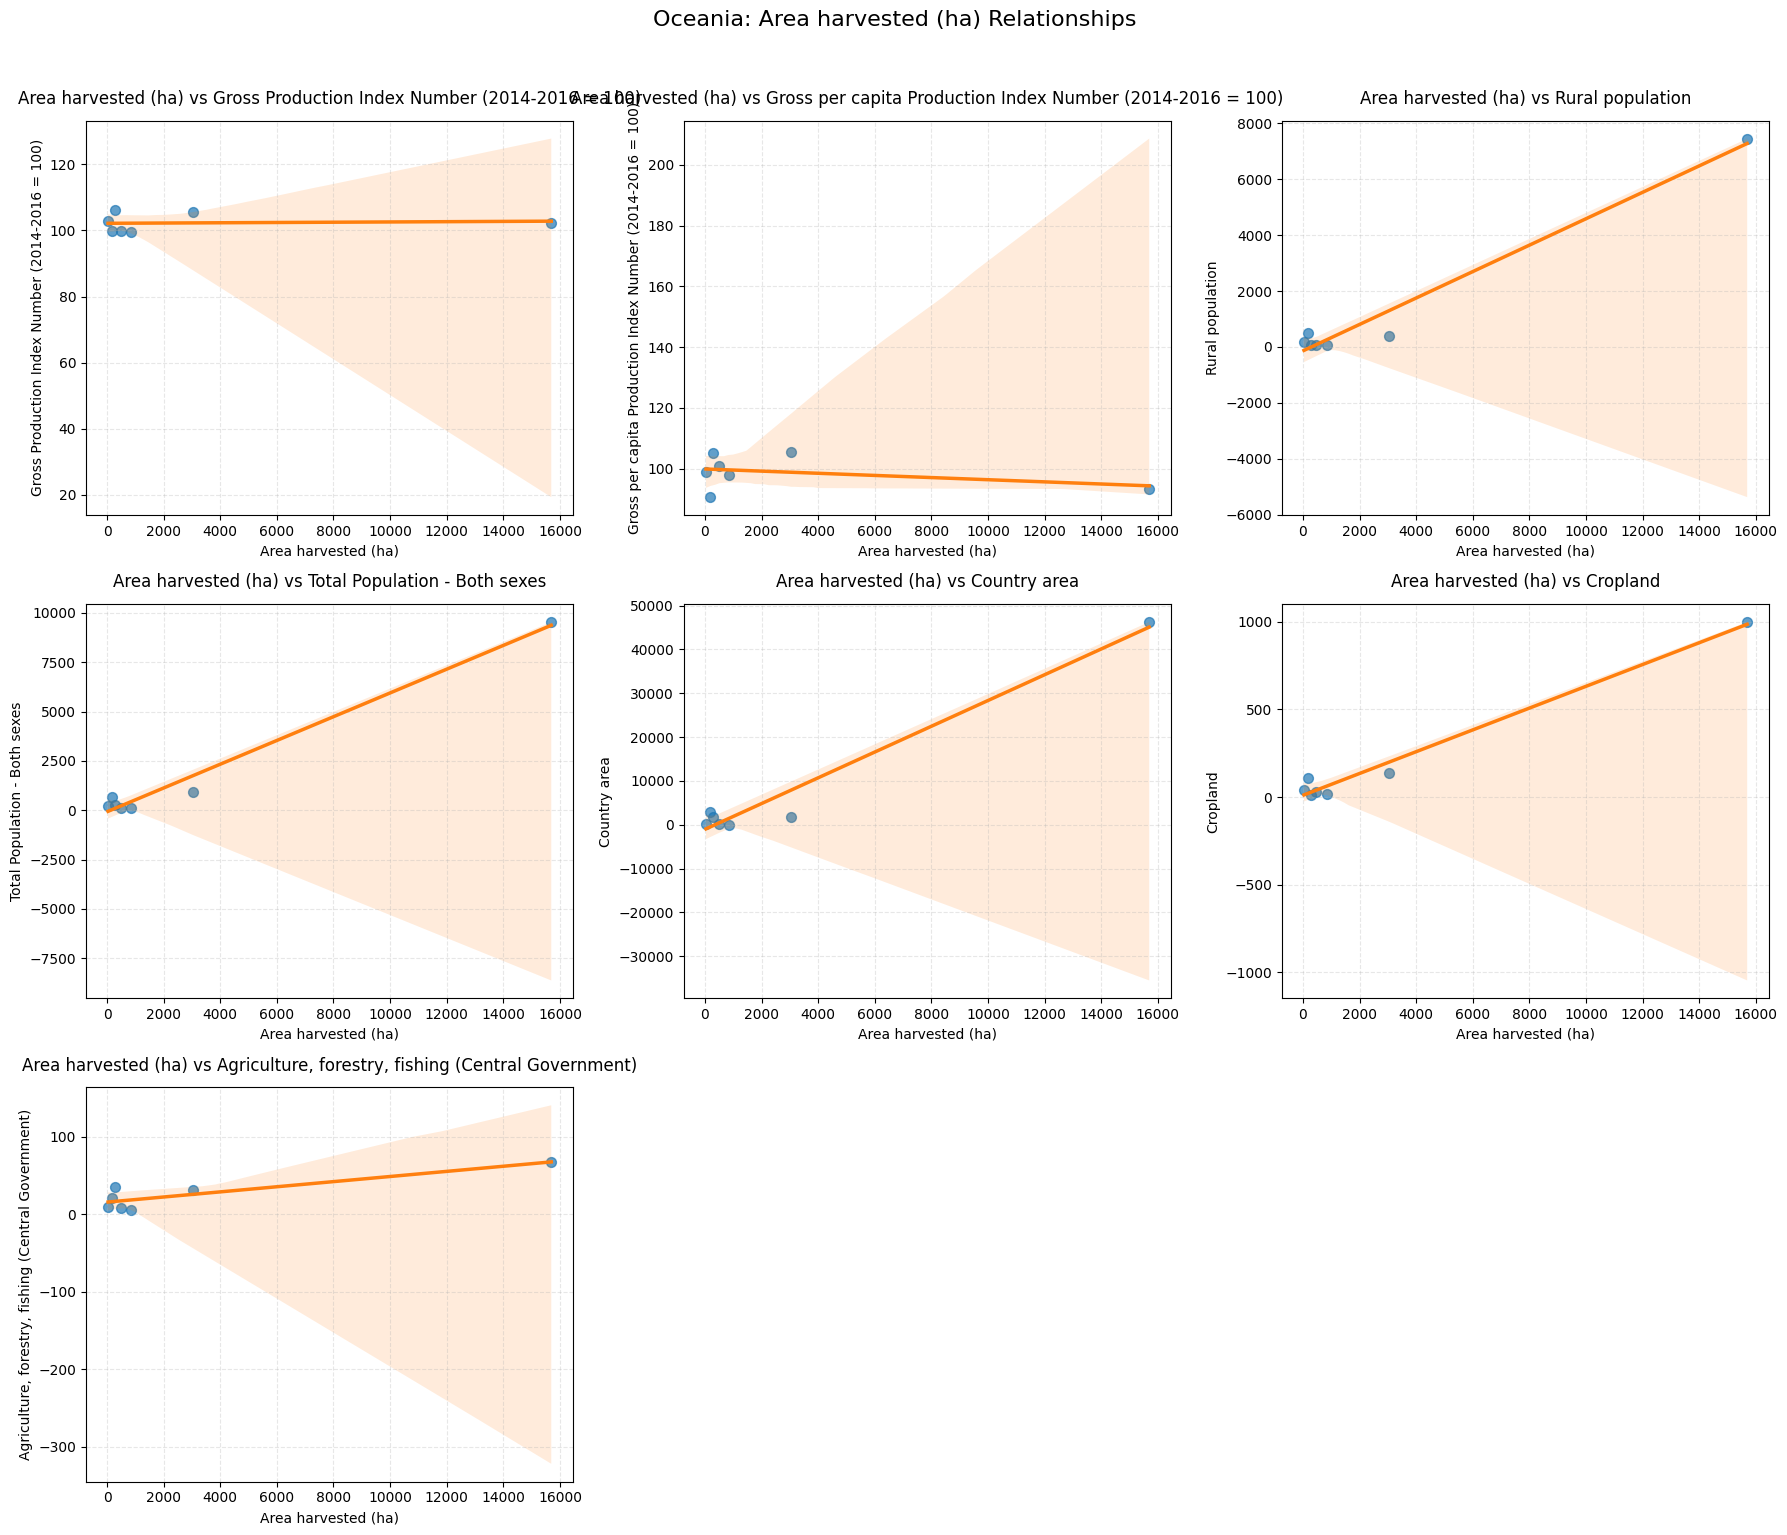

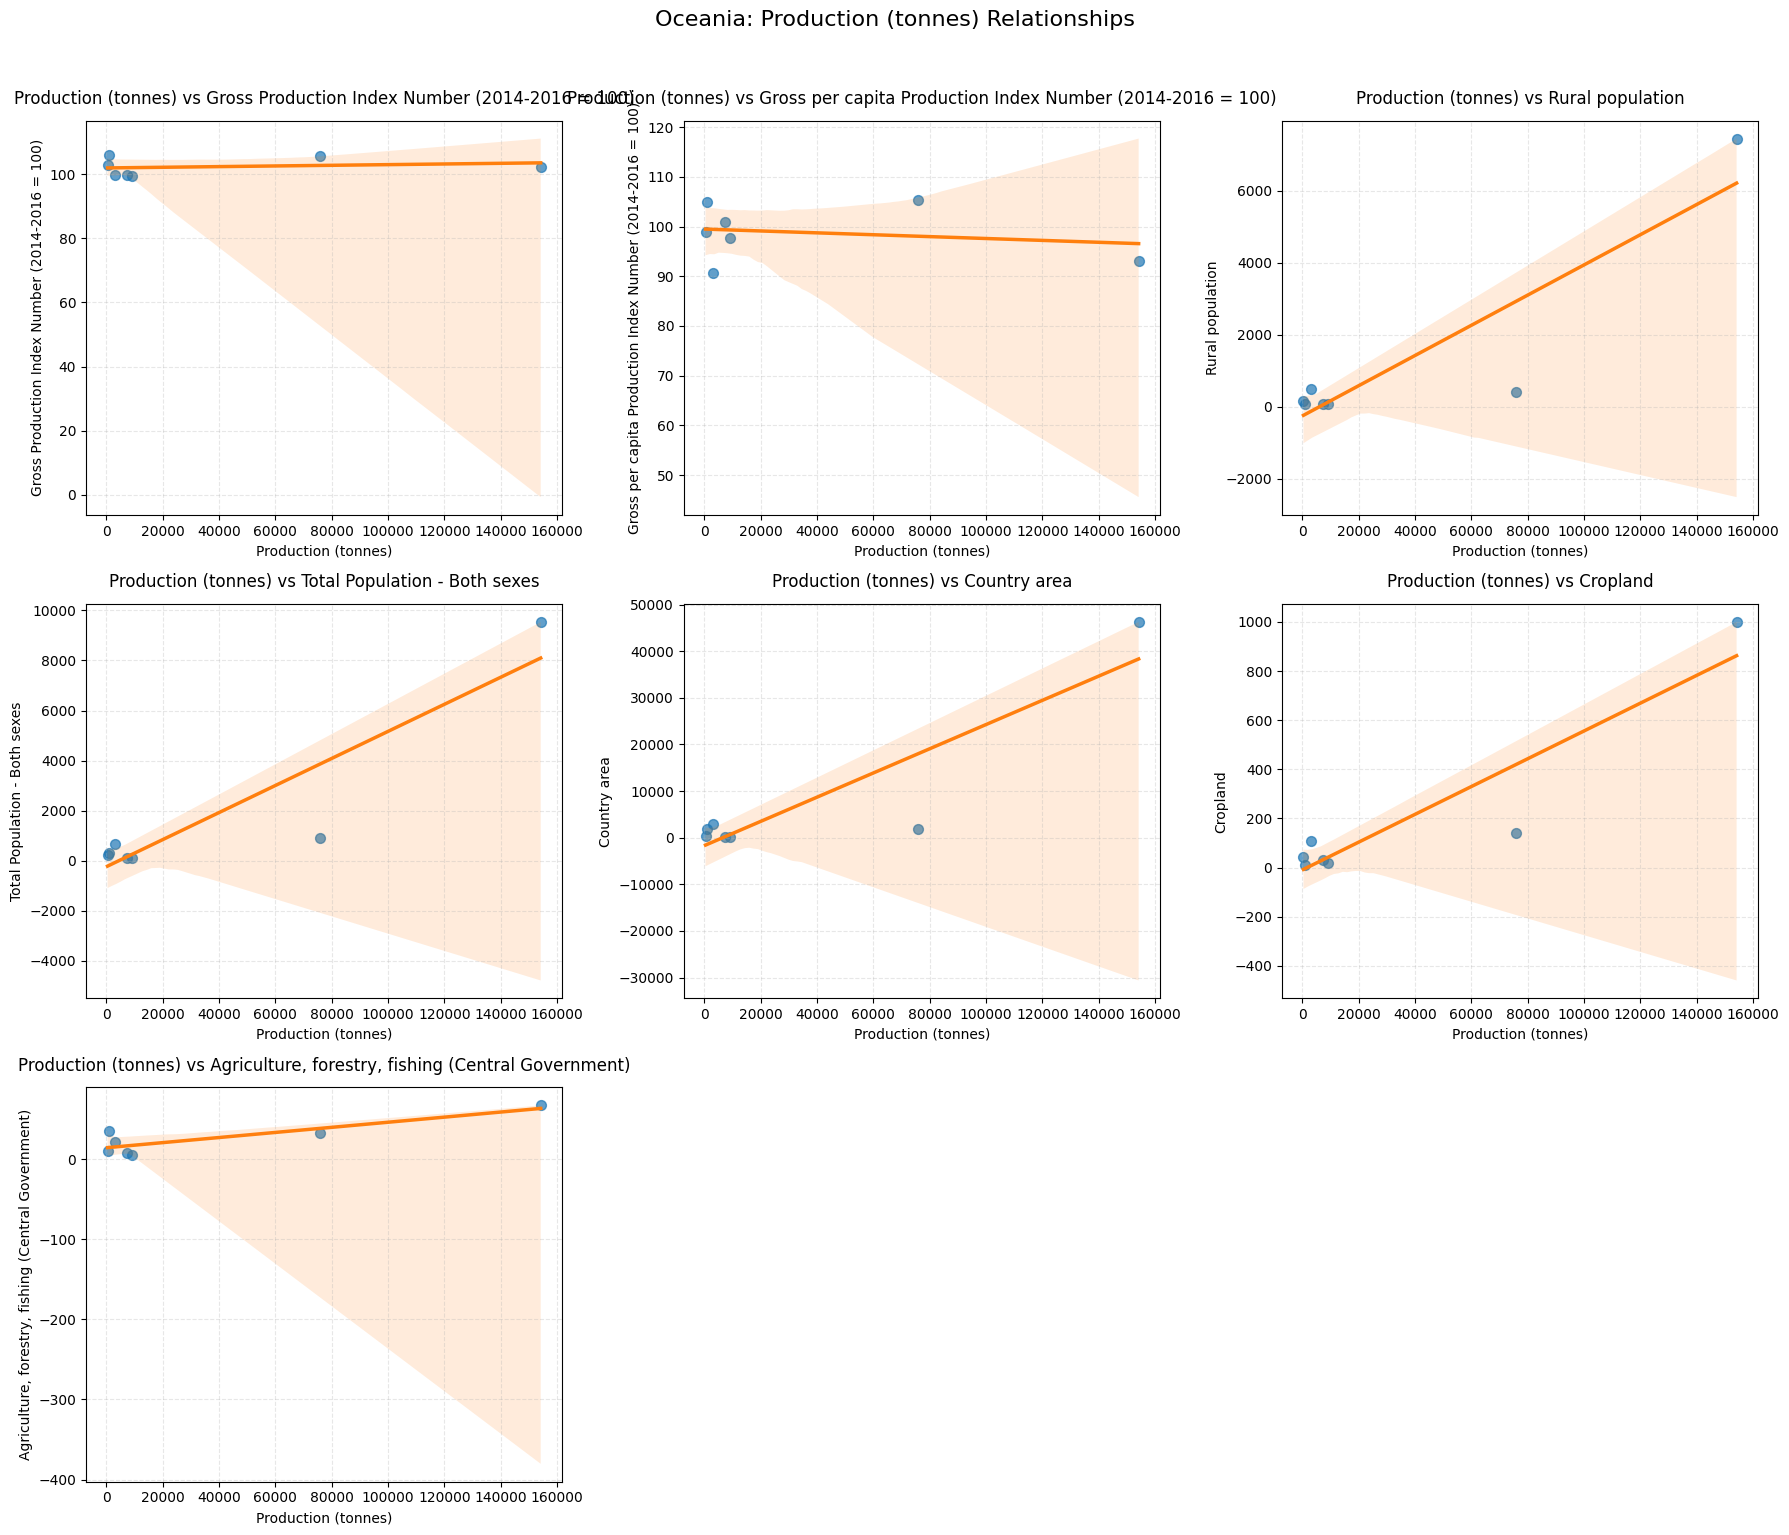

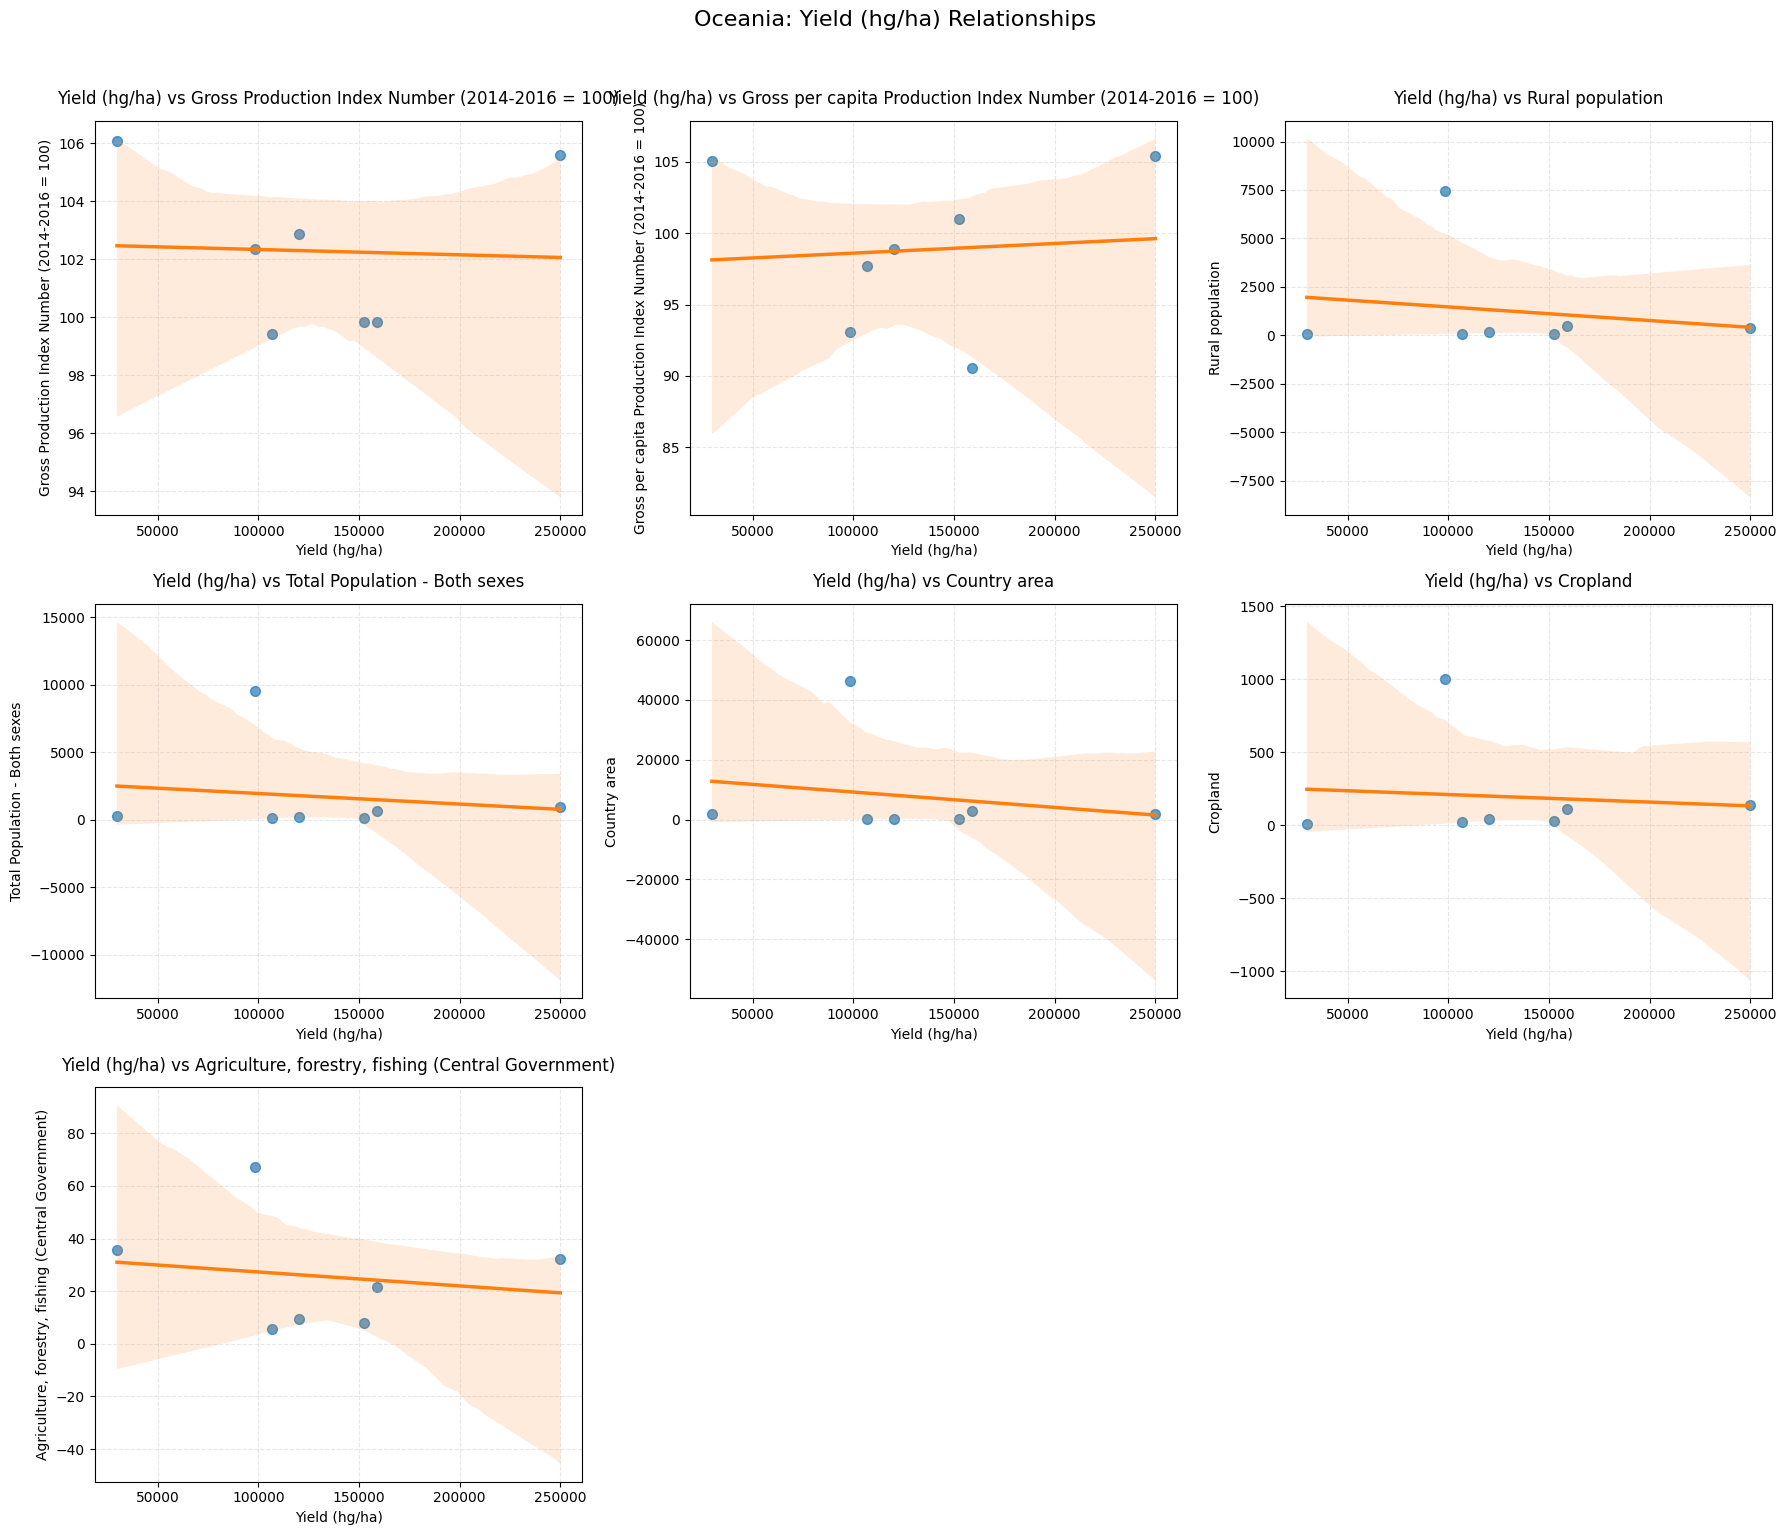

In [86]:
# 1. Filter by Country Group
country_groups = df['Country Group'].unique()

# 2. Define plotting function
def create_scatter_grid(filtered_df, group_name):
    numerical_cols = filtered_df.select_dtypes(include=['float64', 'int64']).columns
    primary_vars = ['Area harvested (ha)', 'Production (tonnes)', 'Yield (hg/ha)']
    other_numerical = [col for col in numerical_cols if col not in primary_vars]
    
    for primary_var in primary_vars:
        n_plots = len(other_numerical)
        n_rows = math.ceil(n_plots / 3)
        
        fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
        fig.suptitle(f'{group_name}: {primary_var} Relationships', y=1.02, fontsize=16)
        axes = axes.flatten()
        
        for i, col in enumerate(other_numerical):
            sns.regplot(data=filtered_df, x=primary_var, y=col, ax=axes[i],
                       scatter_kws={'alpha': 0.7, 's': 50, 'color': '#1f77b4'},
                       line_kws={'color': '#ff7f0e', 'linewidth': 2.5})
            axes[i].set_title(f'{primary_var} vs {col}', pad=12)
            axes[i].set_xlabel(primary_var)
            axes[i].set_ylabel(col)
            axes[i].grid(True, linestyle='--', alpha=0.3)
        
        # Hide empty subplots
        for j in range(i+1, len(axes)):
            axes[j].axis('off')
        
        plt.tight_layout()
        plt.show()

# 3. Generate plots for each country group
for group in country_groups:
    group_df = df[df['Country Group'] == group]
    print(f"\n{'='*50}\nAnalyzing Country Group: {group}\n{'='*50}")
    create_scatter_grid(group_df, group)

# Conclusion
The data is scarce and we have a lot of nulls. We thus confirm that FAO's datasets are not easily integrated. 

We can ignore correlations between variables of the same dataset and consider only the correlations between different datasets. In that sense, it is interesting to say that yield was the one that least correlation had with other variables. The strongest correlation was between production and cropland. Then we have production and investement in agriculture, forestry and fishing. Our plots confirm that.

When we filter by continent ('Country Group') we see that outliers affect the scatterplots so a possible way to continue is to remove them to see different relations.